# Analysis on Gold Atlantis - Repaying the Credit

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Uploading the dataset**

In [2]:
londf = pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv') 

In [3]:
londf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [4]:
londf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [5]:
londf.shape

(100000, 24)

In [6]:
londf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [7]:
londf.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

The data shows null values in four columns.

# Dividing the data into Categorial and Numerical Columns

In [8]:
def data_types(df):
    cat_var =[] # creating an empty list for categorial values
    con_var =[] # creating an empty list for continous values
    
    for col in df:
        if df[col].nunique()<50:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var 

In [9]:
# printing the categorial and continous values in a table
categorial_var, continous_var = data_types(londf)
print(tabulate({"cat_var":categorial_var,"con_var":continous_var},headers=["Categorial","Continous"]))

Categorial           Continous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# Univariate Analysis on Categorial Columns

In [10]:
# creating a function for the categorial values and print unique, missing values if any and counting the values
def cat_info(col):
    print(f"Unique values in {col} : {londf[col].unique()}")
    print(f"Missing Value counts of {col}: {londf[col].isnull().sum()}")
    print(f"Mode of {col}: {londf[col].mode()[0]}")
    value_counts=londf[col].value_counts()
    print("value counts:", value_counts)

In [11]:
# creating a visualization function which helps to visual each categorial values with the help of bar and pie chart
def cat_visual(col):
    value_counts= londf[col].value_counts()
    per= londf[col].value_counts(normalize=True)*100 #value_counts in percentage
    plt.figure(figsize=(8,6))
    plt.bar(value_counts.index,value_counts.values,width=0.25)
    plt.title(f"value count of{col}")
        
    
    plt.figure(figsize=(8,6))
    plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
    plt.title(f"percentage of {col}")

**1.NAME_CONTRACT_TYPE**

In [12]:
cat_info('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
Missing Value counts of NAME_CONTRACT_TYPE: 0
Mode of NAME_CONTRACT_TYPE: Cash loans
value counts: Cash loans         90517
Revolving loans     9483
Name: NAME_CONTRACT_TYPE, dtype: int64


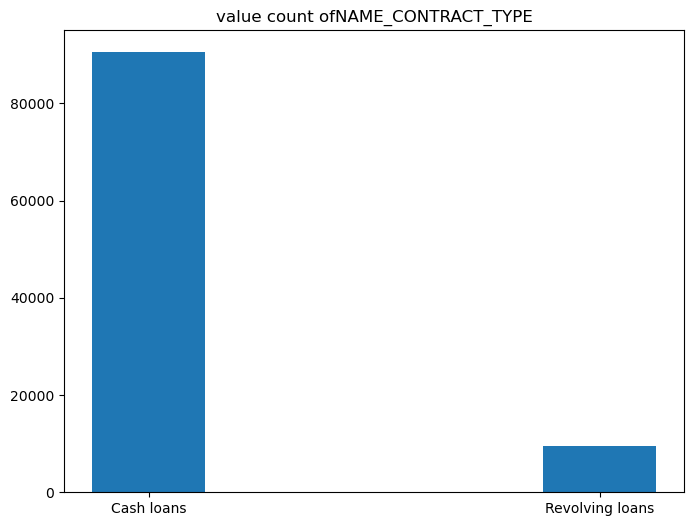

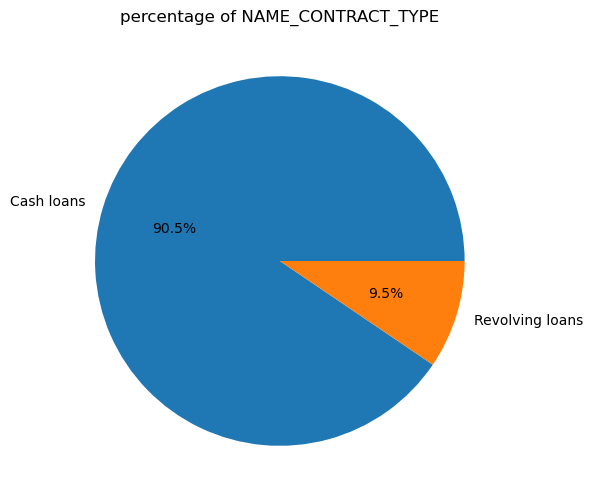

In [13]:
cat_visual('NAME_CONTRACT_TYPE')

**2.TARGET** 

In [14]:
cat_info('TARGET')

Unique values in TARGET : [1 0]
Missing Value counts of TARGET: 0
Mode of TARGET: 0
value counts: 0    91907
1     8093
Name: TARGET, dtype: int64


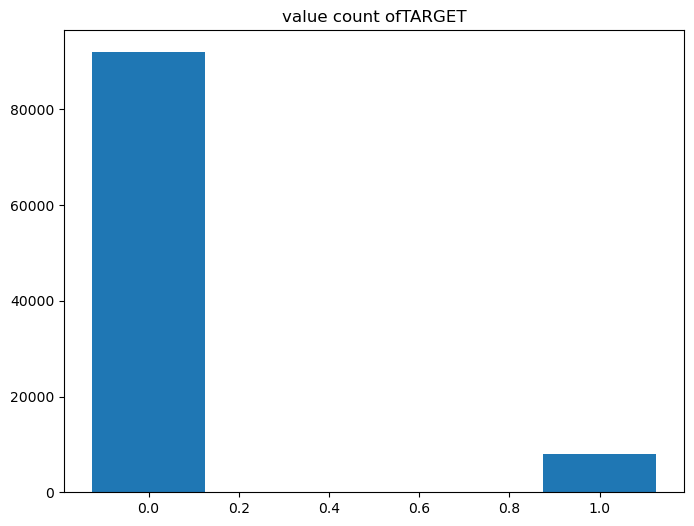

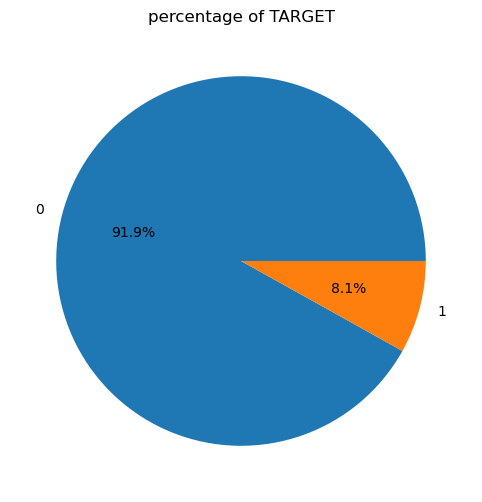

In [15]:
cat_visual('TARGET')

**3.GENDER**

In [16]:
cat_info('GENDER')

Unique values in GENDER : ['M' 'F' 'XNA']
Missing Value counts of GENDER: 0
Mode of GENDER: F
value counts: F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64


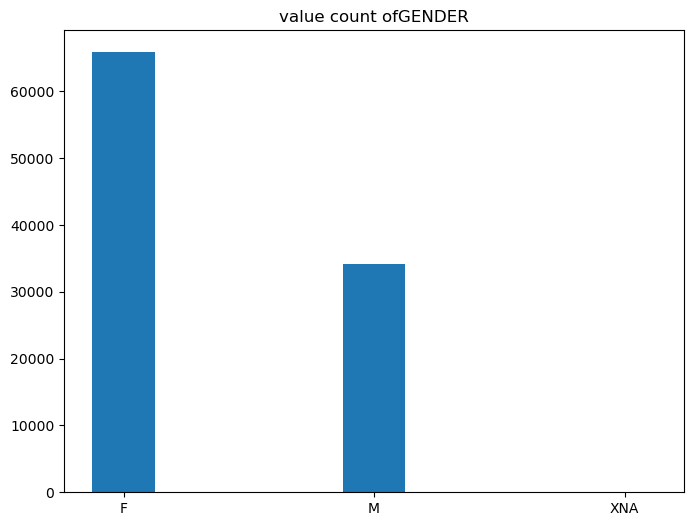

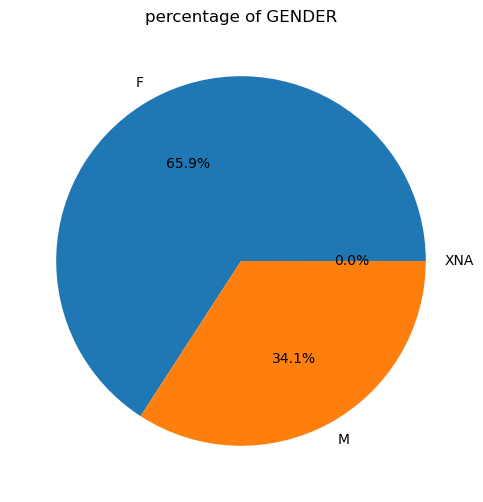

In [17]:
cat_visual('GENDER')

In [18]:
londf['GENDER'].fillna(londf["GENDER"].mode()[0],inplace=True)

In [19]:
londf.GENDER.replace('XNA','F',inplace=True)

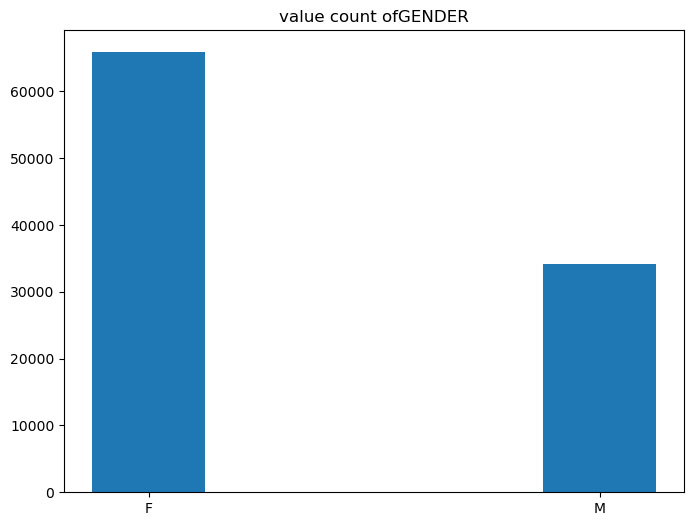

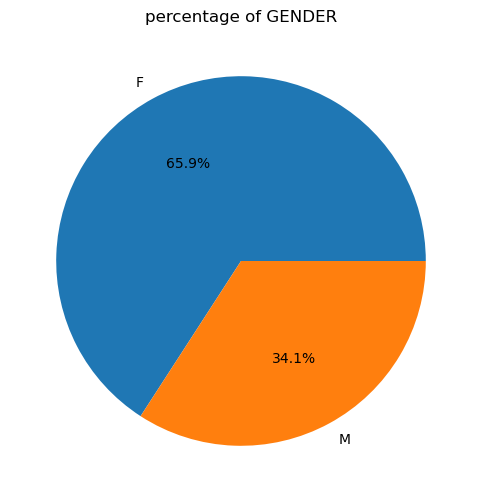

In [20]:
cat_visual('GENDER')

**4.Car**

In [21]:
cat_info('Car')

Unique values in Car : ['N' 'Y']
Missing Value counts of Car: 0
Mode of Car: N
value counts: N    66018
Y    33982
Name: Car, dtype: int64


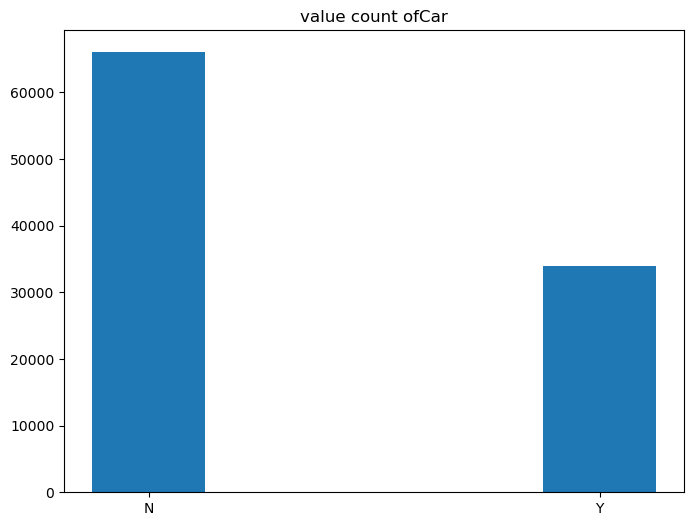

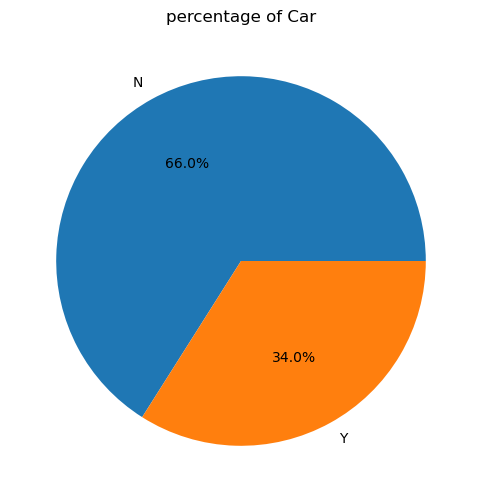

In [22]:
cat_visual('Car')

**5.House** 

In [23]:
cat_info('House')

Unique values in House : ['Y' 'N']
Missing Value counts of House: 0
Mode of House: Y
value counts: Y    69328
N    30672
Name: House, dtype: int64


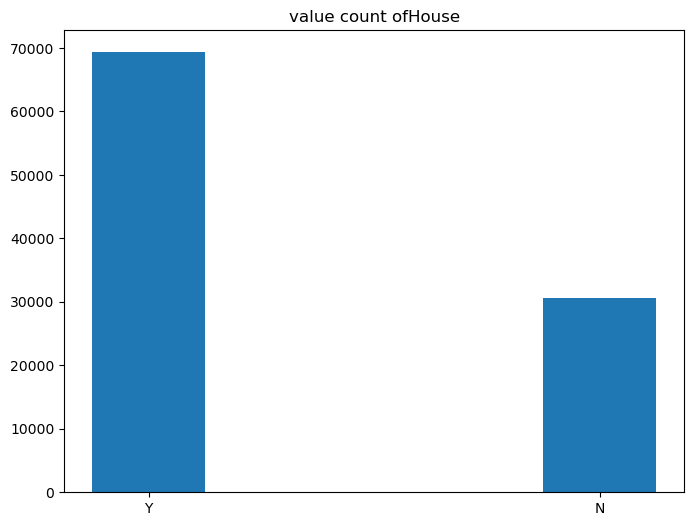

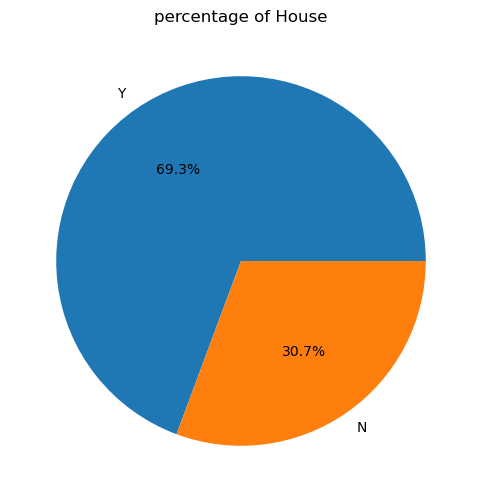

In [24]:
cat_visual('House')

**6.CNT_CHILDREN**

In [25]:
cat_info('CNT_CHILDREN')

Unique values in CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12]
Missing Value counts of CNT_CHILDREN: 0
Mode of CNT_CHILDREN: 0
value counts: 0     69966
1     20025
2      8587
3      1227
4       149
5        31
6         9
7         2
8         1
9         1
11        1
12        1
Name: CNT_CHILDREN, dtype: int64


In [26]:
londf.loc[londf['CNT_CHILDREN']>6, 'CNT_CHILDREN']=londf['CNT_CHILDREN'].mode()[0]

In [27]:
cat_info('CNT_CHILDREN')

Unique values in CNT_CHILDREN : [0 1 2 3 4 5 6]
Missing Value counts of CNT_CHILDREN: 0
Mode of CNT_CHILDREN: 0
value counts: 0    69972
1    20025
2     8587
3     1227
4      149
5       31
6        9
Name: CNT_CHILDREN, dtype: int64


**7.NAME_TYPE_SUITE**

In [28]:
cat_info('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Missing Value counts of NAME_TYPE_SUITE: 405
Mode of NAME_TYPE_SUITE: Unaccompanied
value counts: Unaccompanied      80789
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64


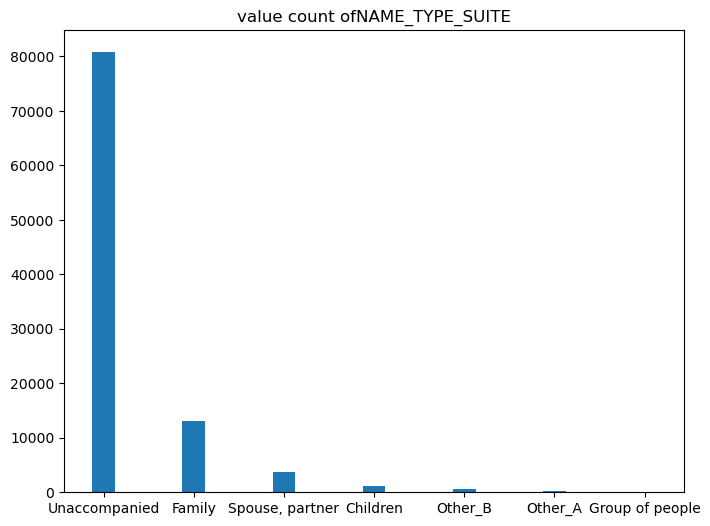

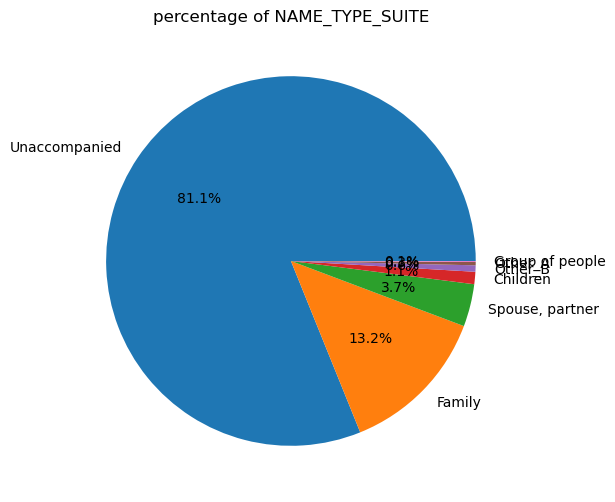

In [29]:
cat_visual('NAME_TYPE_SUITE')

In [30]:
# filled the missing values with mode
londf['NAME_TYPE_SUITE'].fillna(londf["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [31]:
cat_info('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Missing Value counts of NAME_TYPE_SUITE: 0
Mode of NAME_TYPE_SUITE: Unaccompanied
value counts: Unaccompanied      81194
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64


**8.NAME_INCOME_TYPE**

In [32]:
cat_info('NAME_INCOME_TYPE')

Unique values in NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Missing Value counts of NAME_INCOME_TYPE: 0
Mode of NAME_INCOME_TYPE: Working
value counts: Working                 51902
Commercial associate    23217
Pensioner               17857
State servant            7000
Unemployed                 10
Student                     9
Businessman                 4
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64


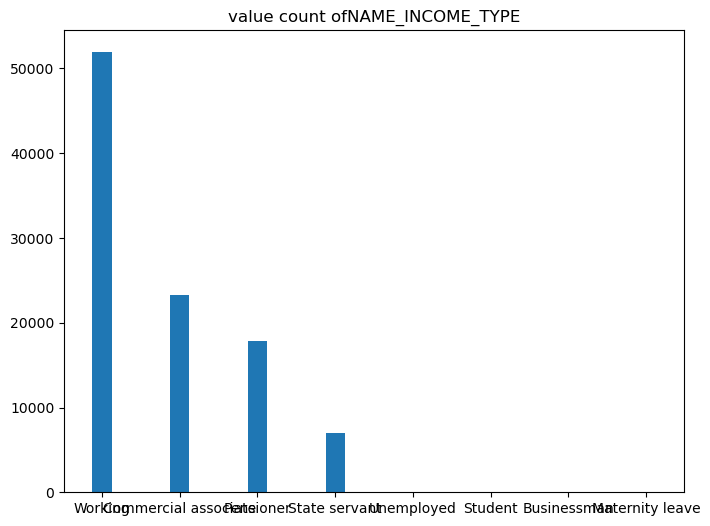

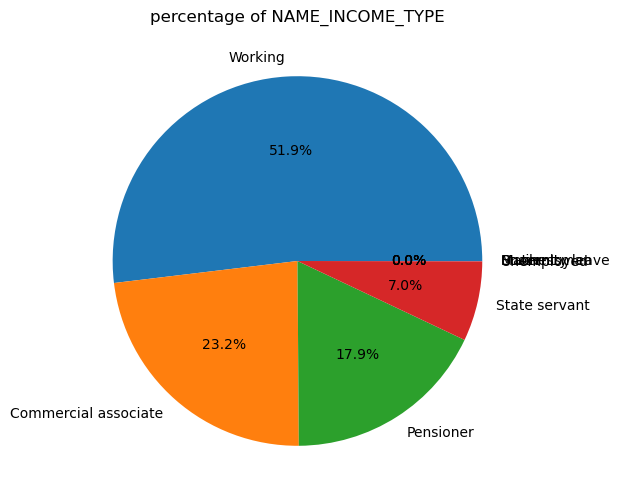

In [33]:
cat_visual('NAME_INCOME_TYPE')

**9.NAME_EDUCATION_TYPE**

In [34]:
cat_info('NAME_EDUCATION_TYPE')

Unique values in NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Missing Value counts of NAME_EDUCATION_TYPE: 0
Mode of NAME_EDUCATION_TYPE: Secondary / secondary special
value counts: Secondary / secondary special    71068
Higher education                 24399
Incomplete higher                 3270
Lower secondary                   1214
Academic degree                     49
Name: NAME_EDUCATION_TYPE, dtype: int64


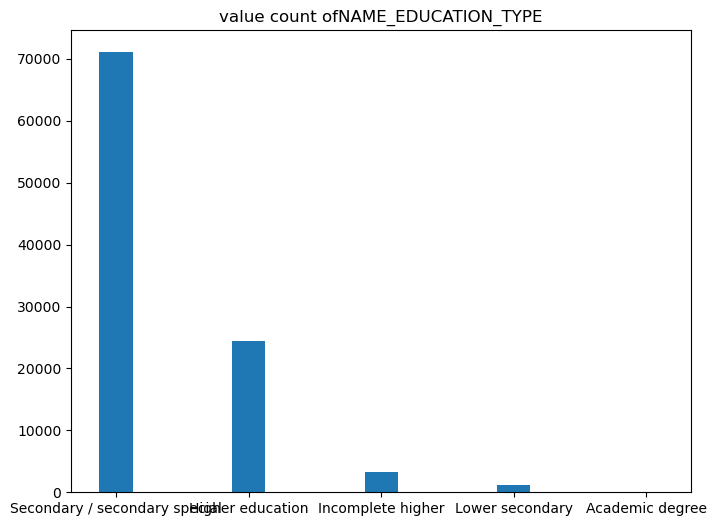

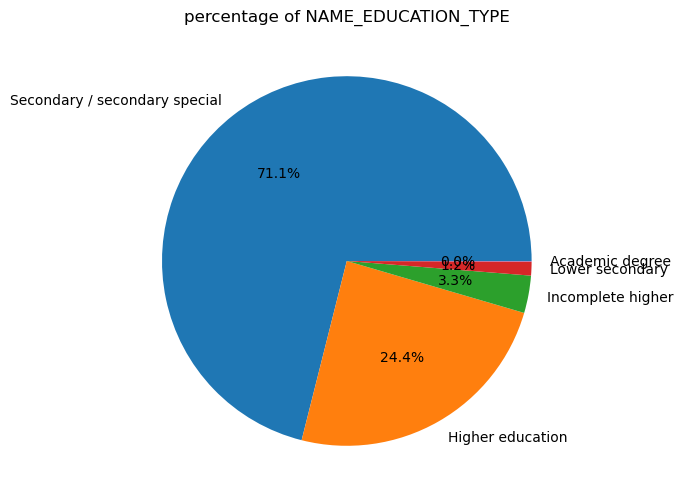

In [35]:
cat_visual('NAME_EDUCATION_TYPE')

**10.NAME_FAMILY_STATUS**

In [36]:
cat_info('NAME_FAMILY_STATUS')

Unique values in NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Missing Value counts of NAME_FAMILY_STATUS: 0
Mode of NAME_FAMILY_STATUS: Married
value counts: Married                 64058
Single / not married    14571
Civil marriage           9769
Separated                6347
Widow                    5254
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64


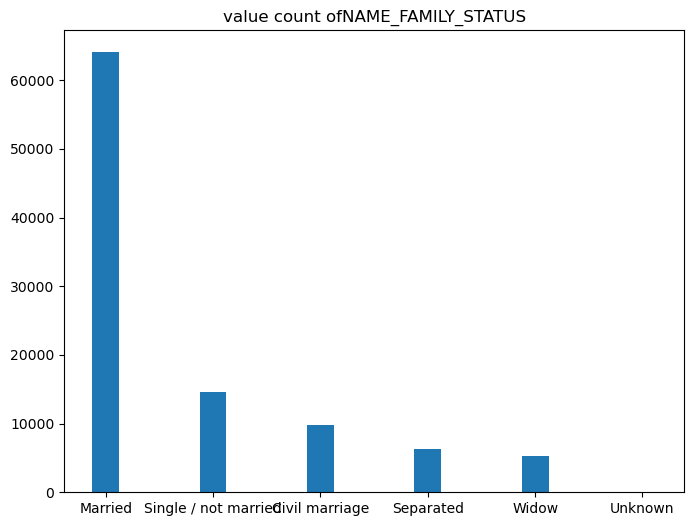

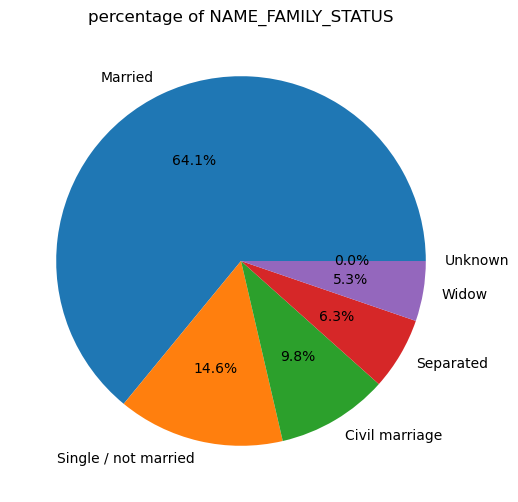

In [37]:
cat_visual('NAME_FAMILY_STATUS')

**11.MOBILE**

In [38]:
cat_info('MOBILE')

Unique values in MOBILE : [1 0]
Missing Value counts of MOBILE: 0
Mode of MOBILE: 1
value counts: 1    99999
0        1
Name: MOBILE, dtype: int64


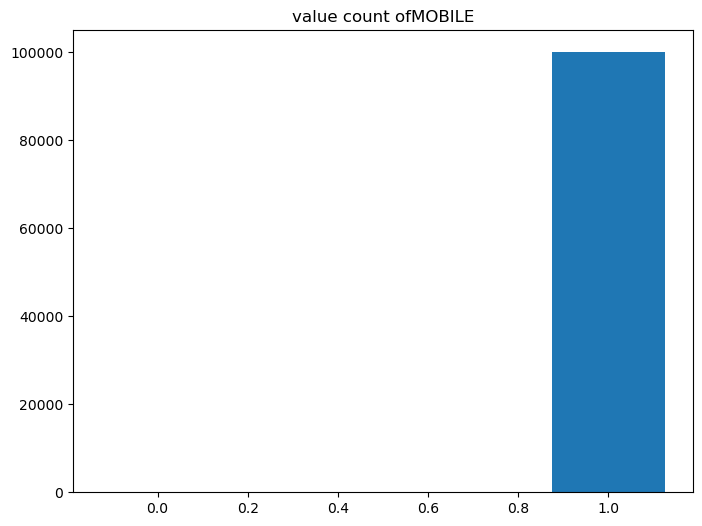

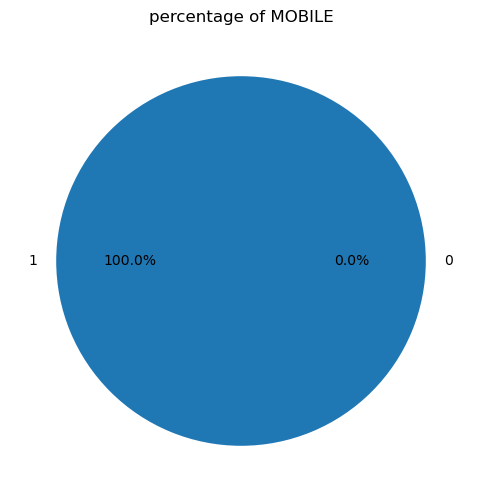

In [39]:
cat_visual('MOBILE')

**12.WORK_PHONE**

In [40]:
cat_info('WORK_PHONE')

Unique values in WORK_PHONE : [1 0]
Missing Value counts of WORK_PHONE: 0
Mode of WORK_PHONE: 1
value counts: 1    82128
0    17872
Name: WORK_PHONE, dtype: int64


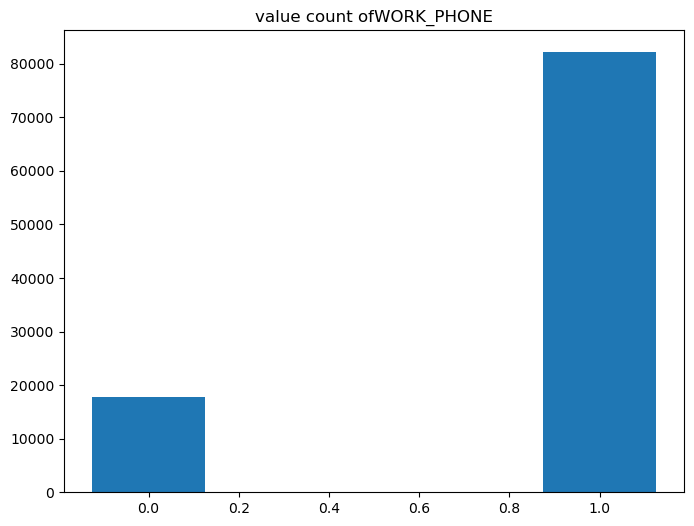

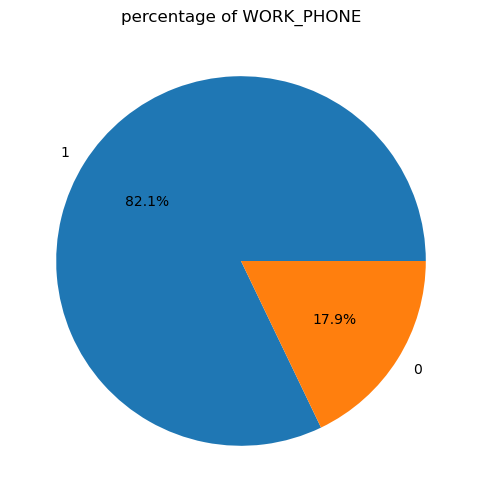

In [41]:
cat_visual('WORK_PHONE')

**13.HOME_PHONE**

In [42]:
cat_info('HOME_PHONE')

Unique values in HOME_PHONE : [0 1]
Missing Value counts of HOME_PHONE: 0
Mode of HOME_PHONE: 0
value counts: 0    80026
1    19974
Name: HOME_PHONE, dtype: int64


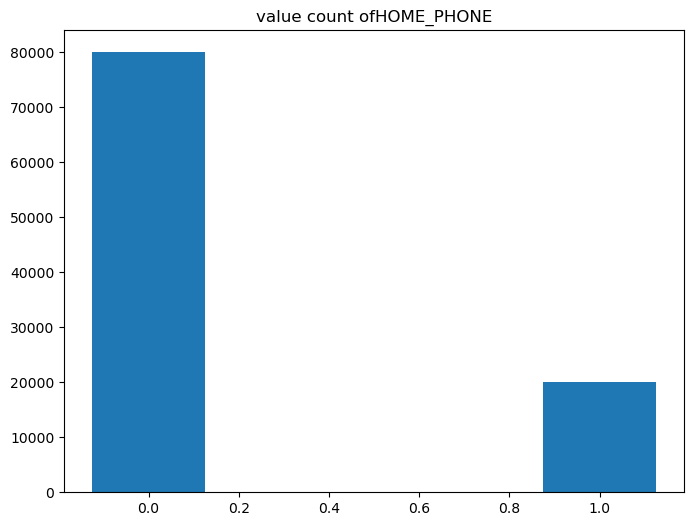

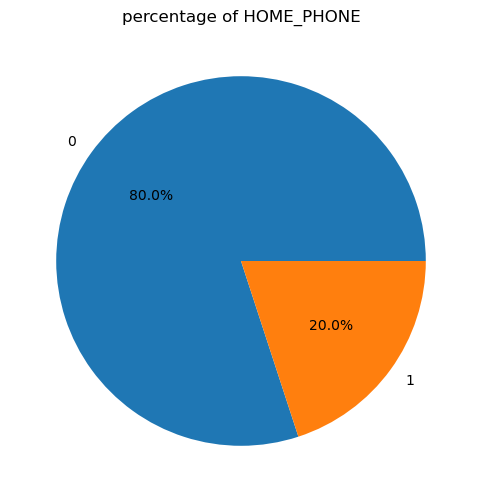

In [43]:
cat_visual('HOME_PHONE')

**14.MOBILE_REACHABLE**

In [44]:
cat_info('MOBILE_REACHABLE')

Unique values in MOBILE_REACHABLE : [1 0]
Missing Value counts of MOBILE_REACHABLE: 0
Mode of MOBILE_REACHABLE: 1
value counts: 1    99799
0      201
Name: MOBILE_REACHABLE, dtype: int64


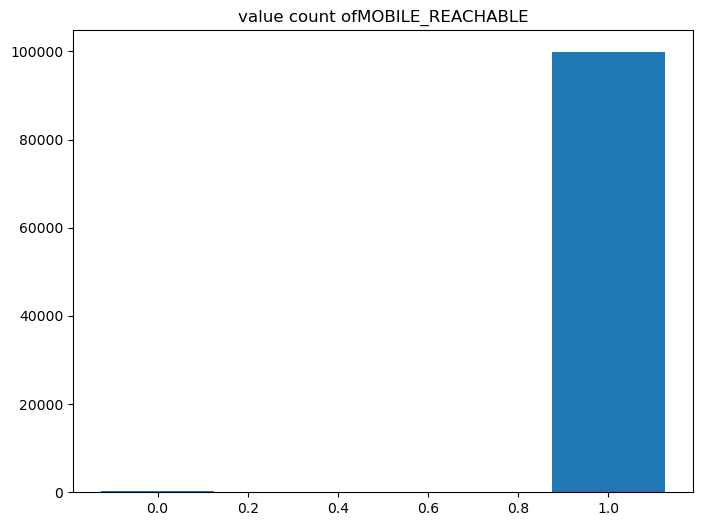

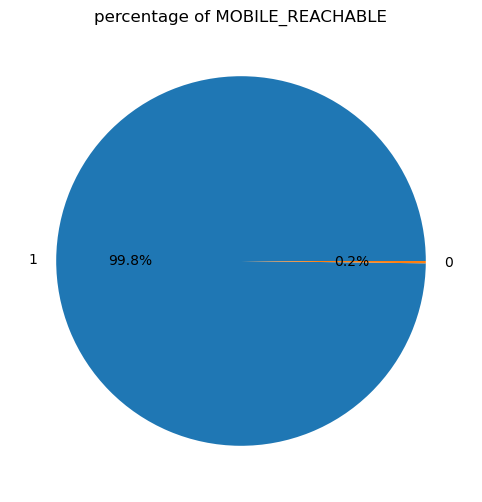

In [45]:
cat_visual('MOBILE_REACHABLE')

**15.FLAG_EMAIL**

In [46]:
cat_info('FLAG_EMAIL')

Unique values in FLAG_EMAIL : [0 1]
Missing Value counts of FLAG_EMAIL: 0
Mode of FLAG_EMAIL: 0
value counts: 0    94381
1     5619
Name: FLAG_EMAIL, dtype: int64


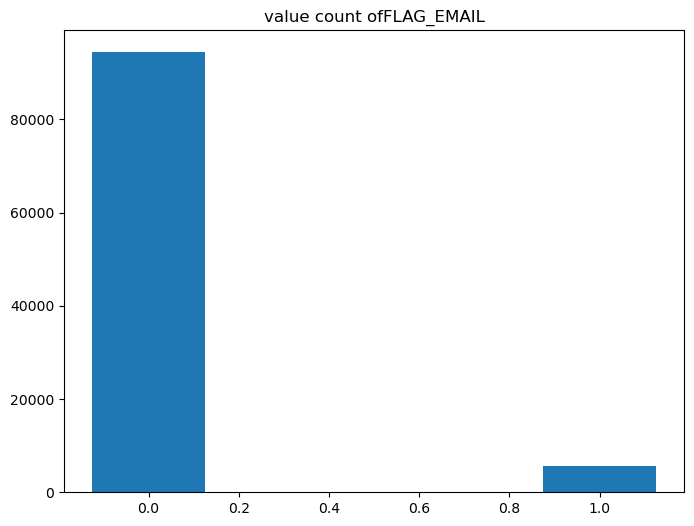

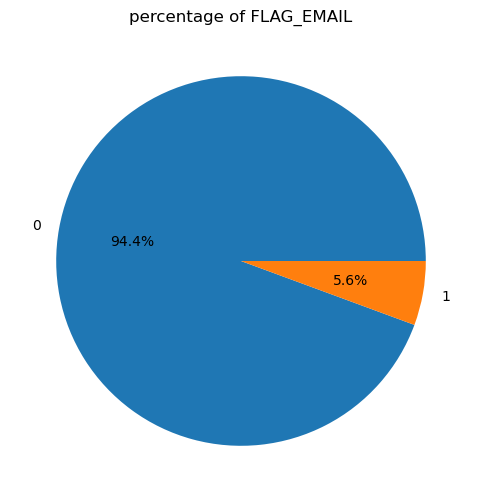

In [47]:
cat_visual('FLAG_EMAIL')

**16.OCCUPATION_TYPE**

In [48]:
cat_info('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Missing Value counts of OCCUPATION_TYPE: 31224
Mode of OCCUPATION_TYPE: Laborers
value counts: Laborers                 17977
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_T

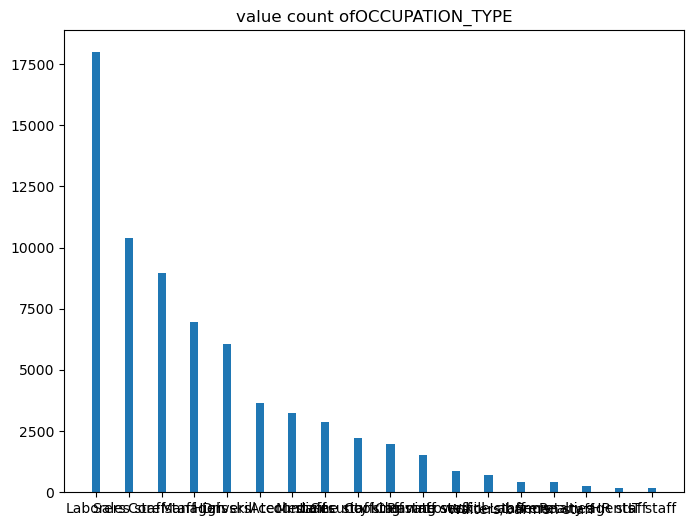

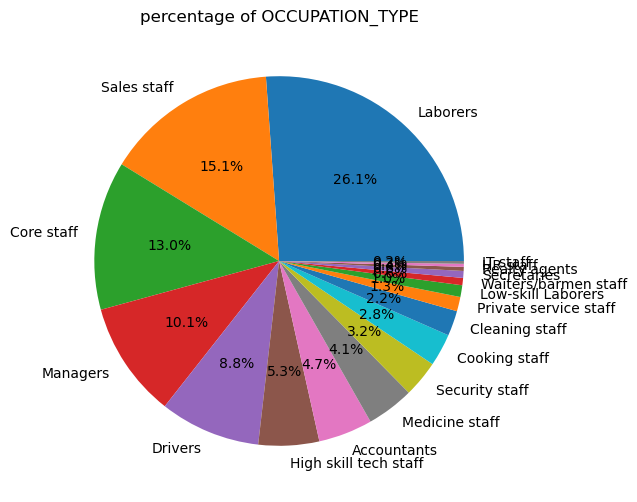

In [49]:
cat_visual('OCCUPATION_TYPE')

In [50]:
# found missing values filled them with mode
londf['OCCUPATION_TYPE'].fillna(londf["OCCUPATION_TYPE"].mode()[0],inplace=True)

In [51]:
cat_info('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Missing Value counts of OCCUPATION_TYPE: 0
Mode of OCCUPATION_TYPE: Laborers
value counts: Laborers                 49201
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtyp

**17.CNT_FAM_MEMBERS**

In [52]:
cat_info('CNT_FAM_MEMBERS')

Unique values in CNT_FAM_MEMBERS : [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Missing Value counts of CNT_FAM_MEMBERS: 1
Mode of CNT_FAM_MEMBERS: 2.0
value counts: 2.0     51721
1.0     21810
3.0     17161
4.0      7965
5.0      1158
6.0       139
7.0        31
8.0         8
9.0         2
10.0        2
13.0        1
14.0        1
Name: CNT_FAM_MEMBERS, dtype: int64


In [53]:
londf.loc[londf['CNT_FAM_MEMBERS']>7.0, 'CNT_FAM_MEMBERS']=londf['CNT_FAM_MEMBERS'].mode()[0]

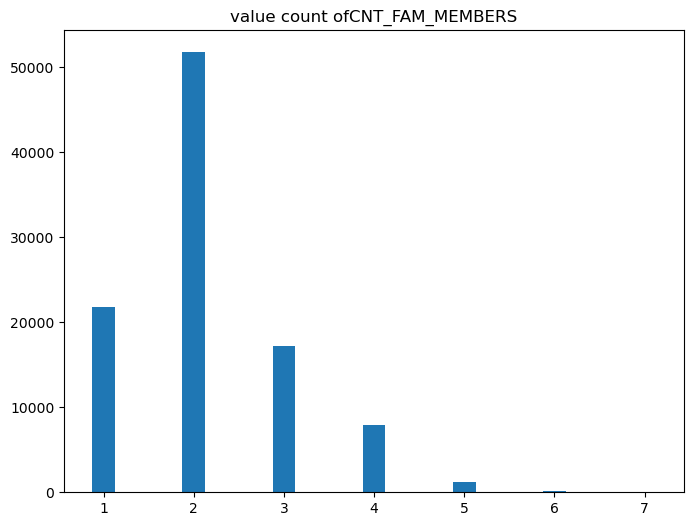

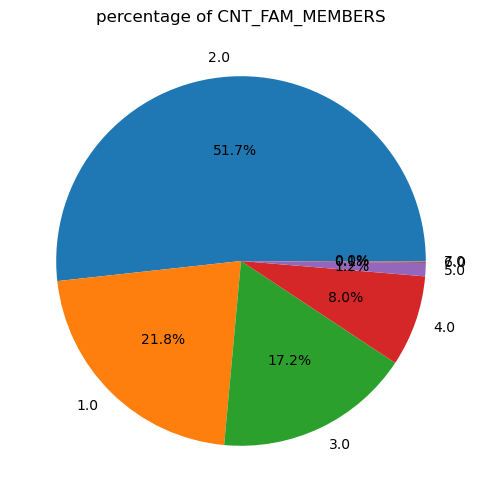

In [54]:
cat_visual('CNT_FAM_MEMBERS')

**18.APPLICATION_DAY**

In [55]:
cat_info('APPLICATION_DAY')

Unique values in APPLICATION_DAY : ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Missing Value counts of APPLICATION_DAY: 0
Mode of APPLICATION_DAY: TUESDAY
value counts: TUESDAY      17408
WEDNESDAY    16924
MONDAY       16543
FRIDAY       16478
THURSDAY     16464
SATURDAY     10980
SUNDAY        5203
Name: APPLICATION_DAY, dtype: int64


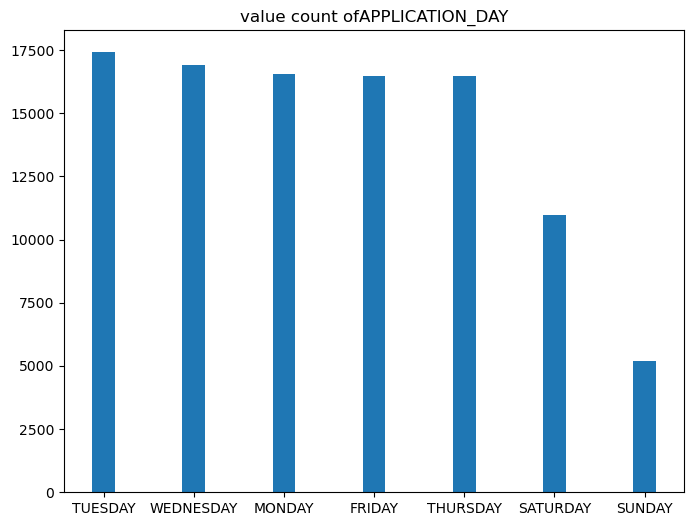

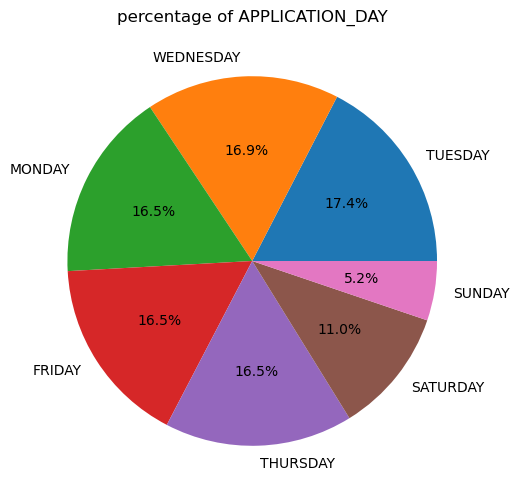

In [56]:
cat_visual('APPLICATION_DAY')

**19.TOTAL_DOC_SUBMITTED**

In [57]:
cat_info('TOTAL_DOC_SUBMITTED')

Unique values in TOTAL_DOC_SUBMITTED : [1 0 2 3 4]
Missing Value counts of TOTAL_DOC_SUBMITTED: 0
Mode of TOTAL_DOC_SUBMITTED: 1
value counts: 1    87860
0     9536
2     2552
3       51
4        1
Name: TOTAL_DOC_SUBMITTED, dtype: int64


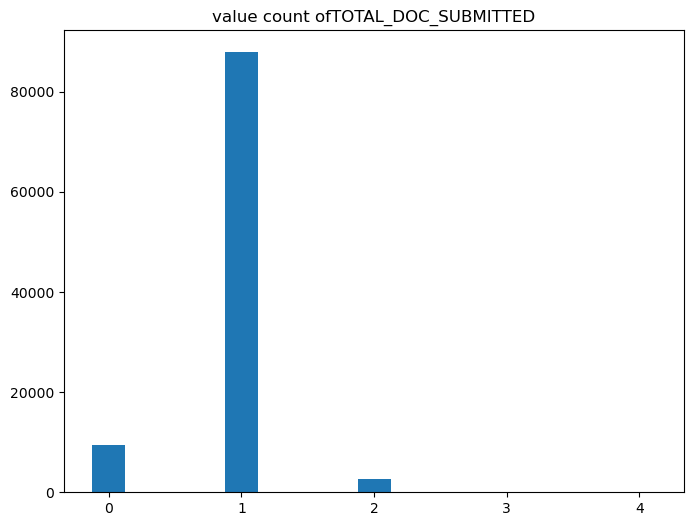

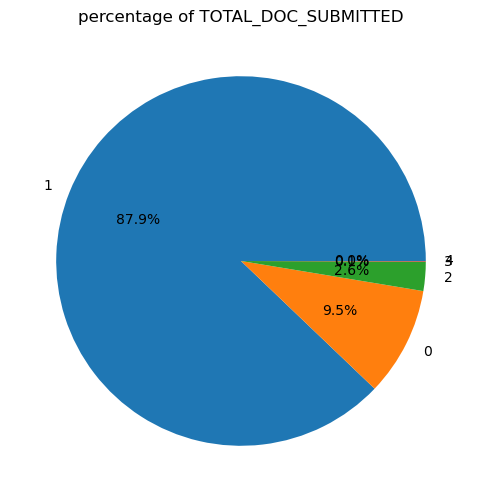

In [58]:
cat_visual('TOTAL_DOC_SUBMITTED')

**20. Days_employed**

In [59]:
londf['DAYS_EMPLOYED'] = pd.cut(londf['DAYS_EMPLOYED'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])
#inf convert string or a number to a floating point number

In [60]:
cat_info('DAYS_EMPLOYED')

Unique values in DAYS_EMPLOYED : [0, 1]
Categories (2, int64): [0 < 1]
Missing Value counts of DAYS_EMPLOYED: 0
Mode of DAYS_EMPLOYED: 0
value counts: 0    82135
1    17865
Name: DAYS_EMPLOYED, dtype: int64


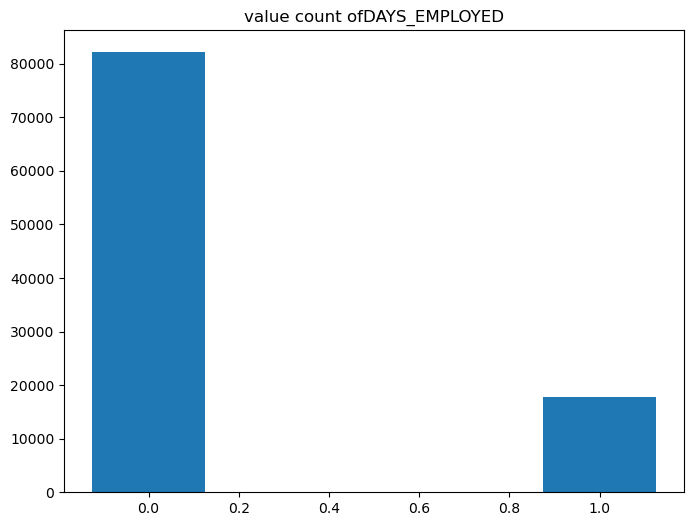

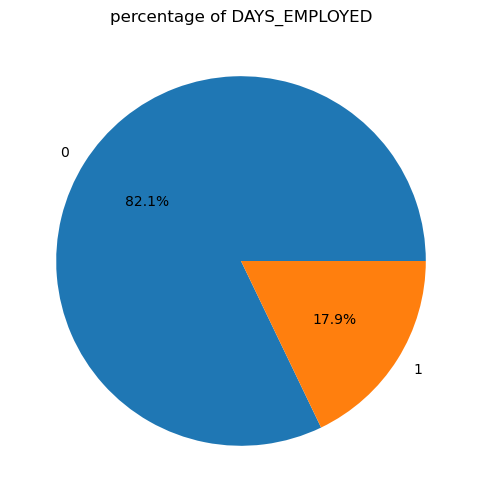

In [61]:
cat_visual('DAYS_EMPLOYED')

# Univariate on Numerical Columns

In [62]:
def num_info(col):
    summary=londf[col].describe()
    print(summary)
    print(f"median of {col}: {londf[col].median()}")
    print(f"mode of {col}: {londf[col].mode()[0]}")
    print(f"missing values {col}: {londf[col].isnull().sum()}")
    print(f"skewness of {col}:{londf[col].skew()}")
    print(f"Kurtosis of {col}: {londf[col].kurt()}")

In [63]:
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(londf[col])
    sns.boxplot(y=londf[col],ax=ax[1])

**2.AMT_INCOME_TOTAL**

In [64]:
num_info('AMT_INCOME_TOTAL')

count    1.000000e+05
mean     1.694261e+05
std      3.835007e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
median of AMT_INCOME_TOTAL: 144000.0
mode of AMT_INCOME_TOTAL: 135000.0
missing values AMT_INCOME_TOTAL: 0
skewness of AMT_INCOME_TOTAL:282.9480521796017
Kurtosis of AMT_INCOME_TOTAL: 86137.60178834871


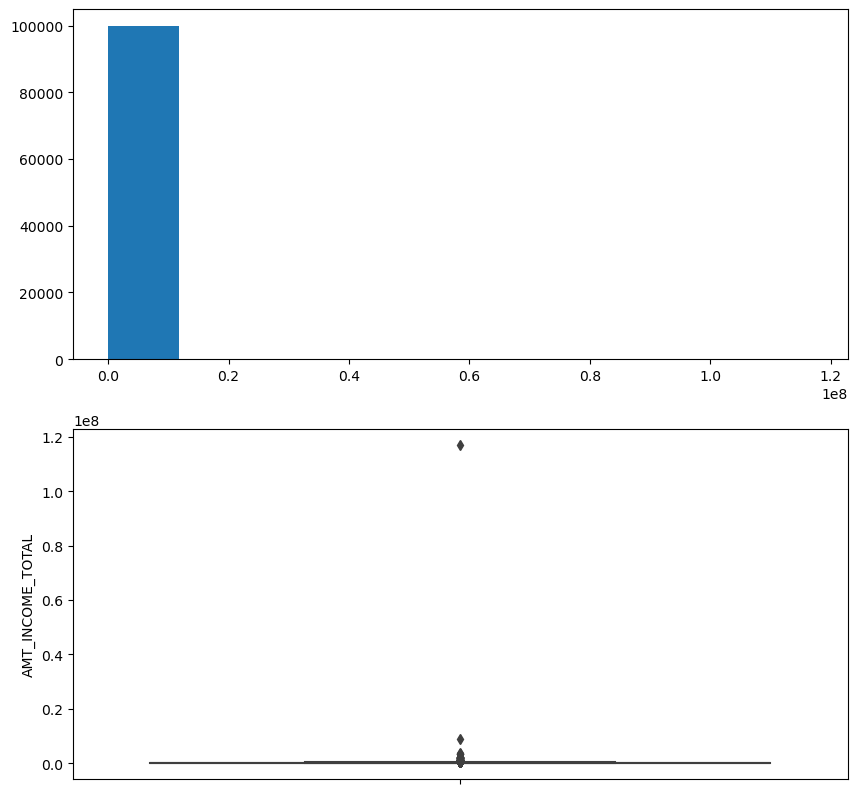

In [65]:
num_visual('AMT_INCOME_TOTAL')

**Outliers Treatment**

In [66]:
q1 = londf["AMT_INCOME_TOTAL"].quantile(.25)
q3 = londf["AMT_INCOME_TOTAL"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
londf.loc[londf["AMT_INCOME_TOTAL"]>uf,"AMT_INCOME_TOTAL"]=londf["AMT_INCOME_TOTAL"].median()
londf.loc[londf["AMT_INCOME_TOTAL"]<lf,"AMT_INCOME_TOTAL"]=londf["AMT_INCOME_TOTAL"].median()

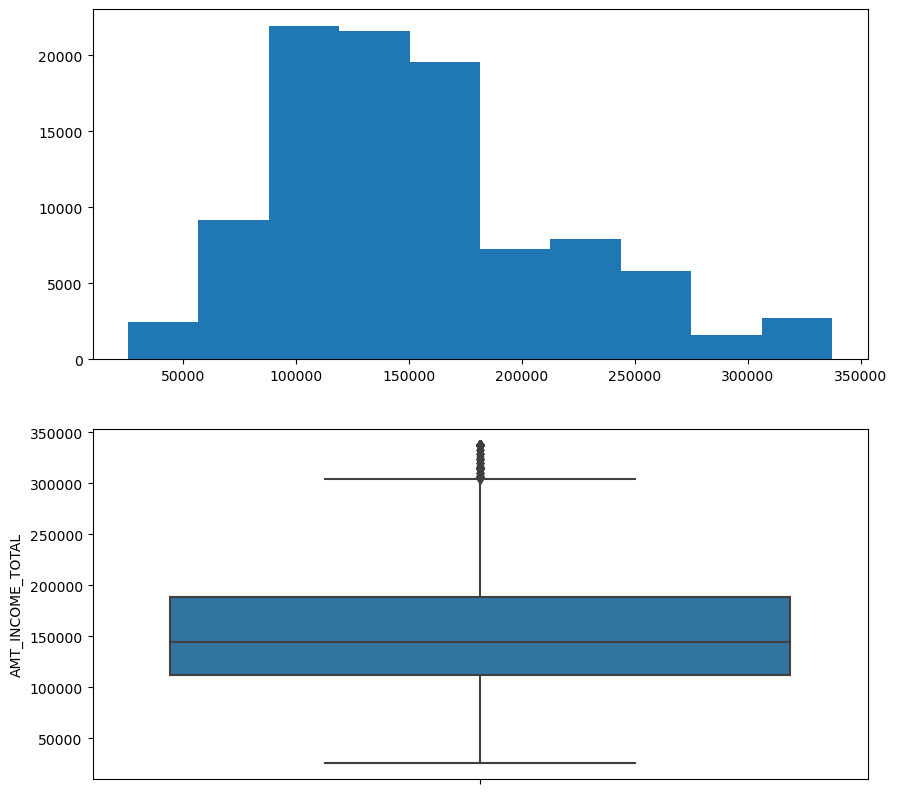

In [67]:
num_visual('AMT_INCOME_TOTAL')

**3.AMT_CREDIT**

In [68]:
num_info('AMT_CREDIT')

count    1.000000e+05
mean     5.990034e+05
std      4.020520e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.130405e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
median of AMT_CREDIT: 513040.5
mode of AMT_CREDIT: 450000.0
missing values AMT_CREDIT: 0
skewness of AMT_CREDIT:1.2093935930309228
Kurtosis of AMT_CREDIT: 1.777990141462404


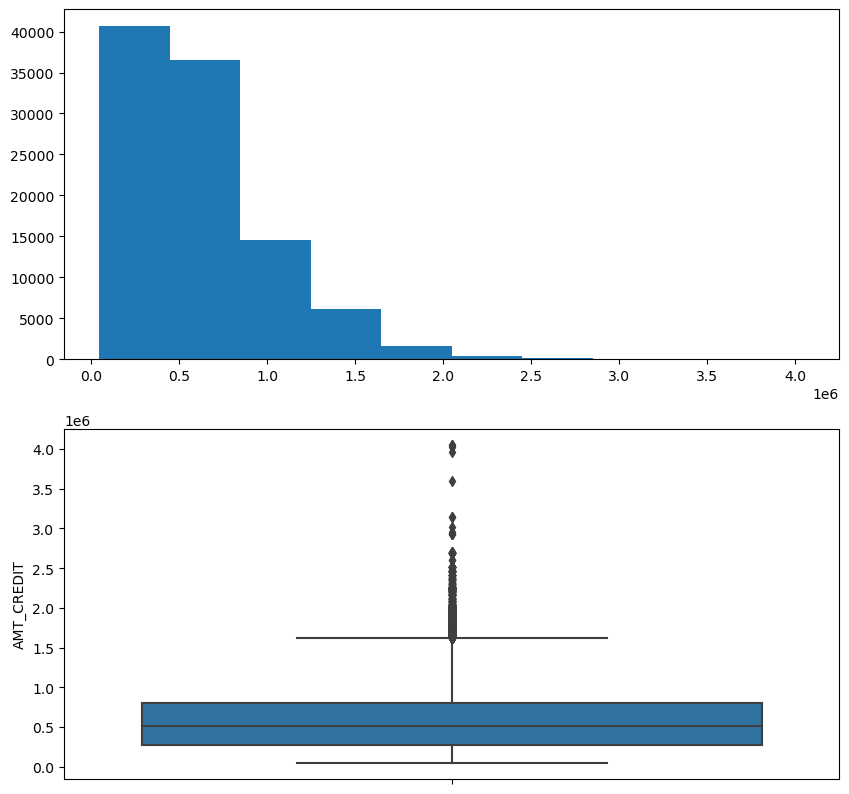

In [69]:
num_visual('AMT_CREDIT')

**Outliers Treatment**

In [70]:
q1 = londf["AMT_CREDIT"].quantile(.25)
q3 = londf["AMT_CREDIT"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
londf.loc[londf["AMT_CREDIT"]>uf,"AMT_CREDIT"]=londf["AMT_CREDIT"].median()
londf.loc[londf["AMT_CREDIT"]<lf,"AMT_CREDIT"]=londf["AMT_CREDIT"].median()

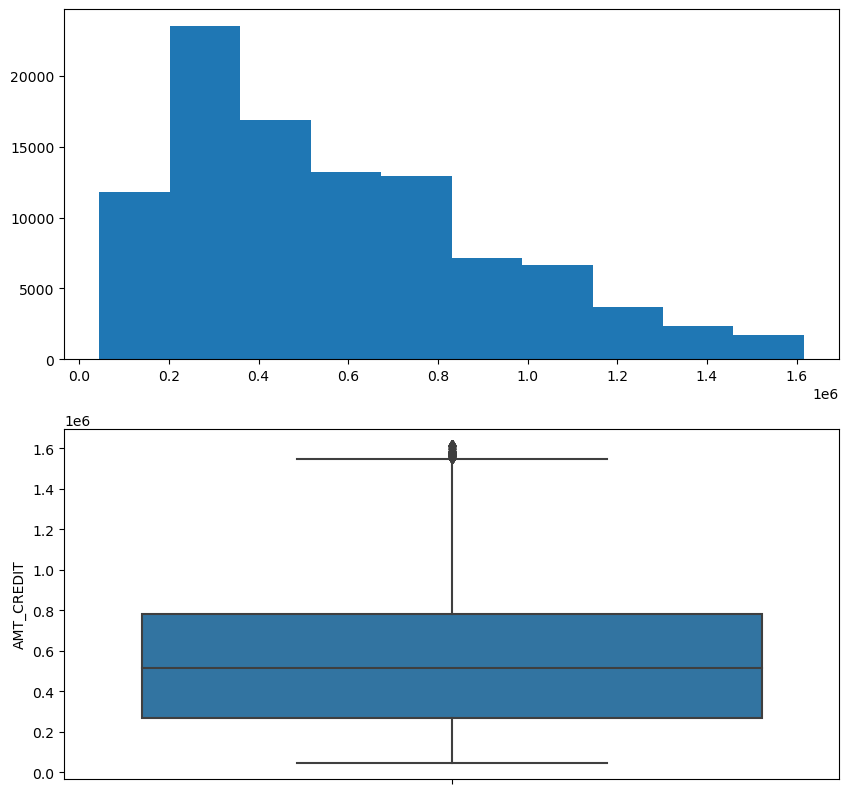

In [71]:
num_visual('AMT_CREDIT')

**4.AMT_GOODS_PRICE**

In [72]:
num_info('AMT_GOODS_PRICE')

count    9.991900e+04
mean     5.383451e+05
std      3.693977e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
median of AMT_GOODS_PRICE: 450000.0
mode of AMT_GOODS_PRICE: 450000.0
missing values AMT_GOODS_PRICE: 81
skewness of AMT_GOODS_PRICE:1.3286750049567124
Kurtosis of AMT_GOODS_PRICE: 2.2899686333422142


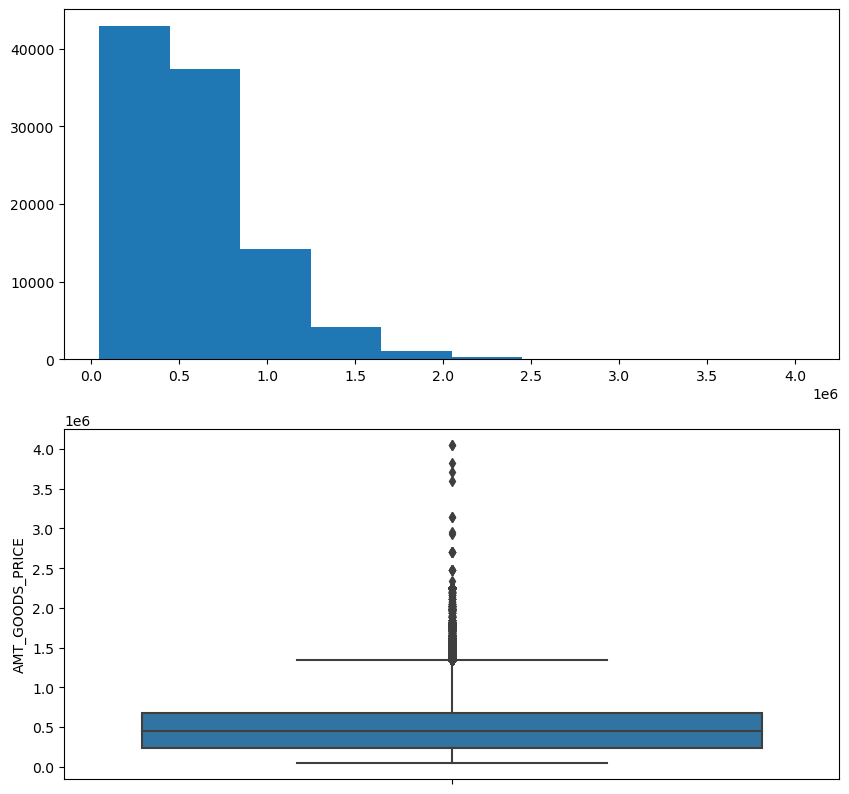

In [73]:
num_visual('AMT_GOODS_PRICE')

**Outliers Treatment**

In [74]:
q1 = londf["AMT_GOODS_PRICE"].quantile(.25)
q3 = londf["AMT_GOODS_PRICE"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
londf.loc[londf["AMT_GOODS_PRICE"]>uf,"AMT_GOODS_PRICE"]=londf["AMT_GOODS_PRICE"].median()
londf.loc[londf["AMT_GOODS_PRICE"]<lf,"AMT_GOODS_PRICE"]=londf["AMT_GOODS_PRICE"].median()

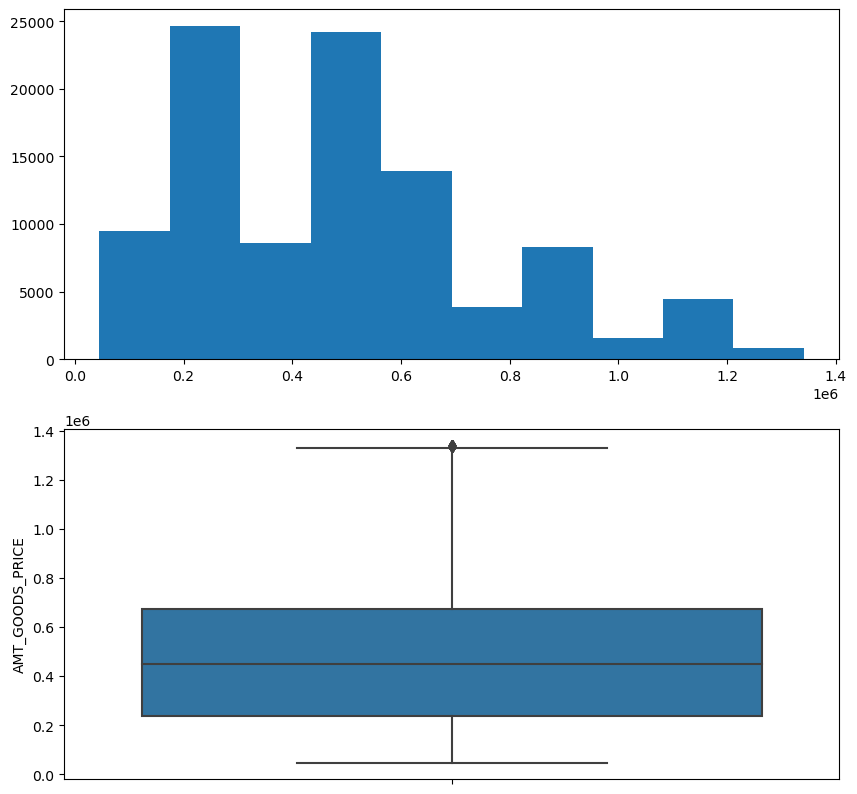

In [75]:
num_visual('AMT_GOODS_PRICE')

In [76]:
# q1 = londf["DAYS_EMPLOYED"].quantile(.25)
# q3 = londf["DAYS_EMPLOYED"].quantile(.75)
# iqr = q3-q1
# lf = q1-1.5*iqr
# uf = q3+1.5*iqr
# londf.loc[londf["DAYS_EMPLOYED"]>uf,"DAYS_EMPLOYED"]=londf["DAYS_EMPLOYED"].mean()
# londf.loc[londf["DAYS_EMPLOYED"]<lf,"DAYS_EMPLOYED"]=londf["DAYS_EMPLOYED"].mean()

# Bivariate Analysis

**Categorial to Categorial**

In [77]:
londf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,0,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,0,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,0,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,0,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,0,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [78]:
londf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

**1.NAME_CONTRACT_TYPE**

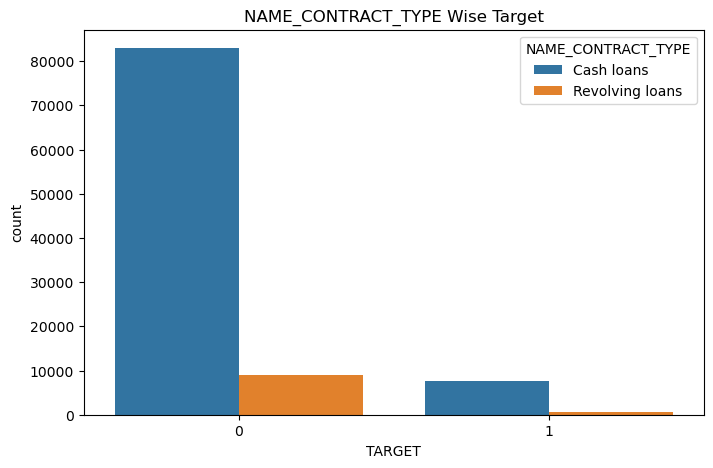

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=londf)
plt.title("NAME_CONTRACT_TYPE Wise Target")
plt.show()

From the graph we can see that most of the people are going for the Cash Loans and only less amount of revolving loans are taken by the Deafulters.

**2.GENDER**

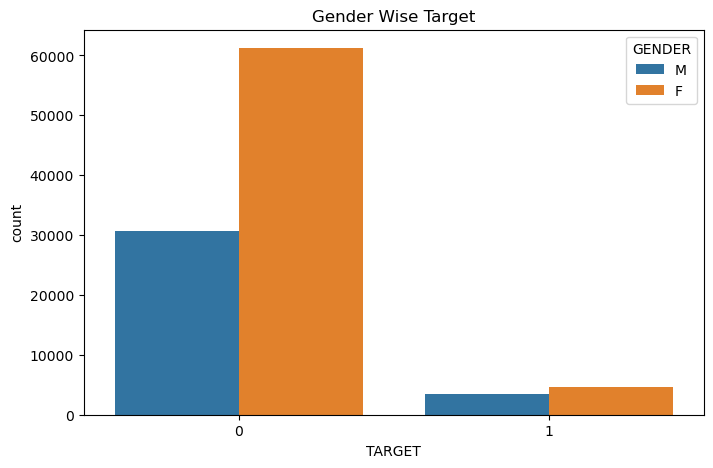

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='GENDER',data=londf)
plt.title("Gender Wise Target")
plt.show()

Females are more likely to be defaulters.

**3.House**

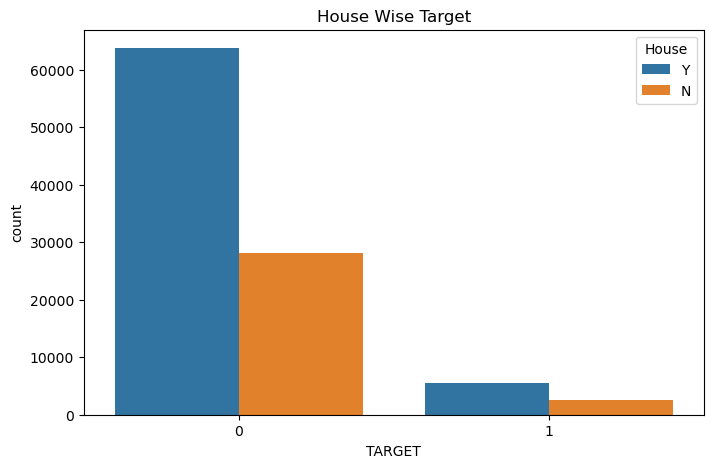

In [81]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='House',data=londf)
plt.title("House Wise Target")
plt.show()

From the above graph we can see that the poeple who do not have a house are considered as a defaulter .i.e, they are more likely to not repay a loan.

**4.Car**

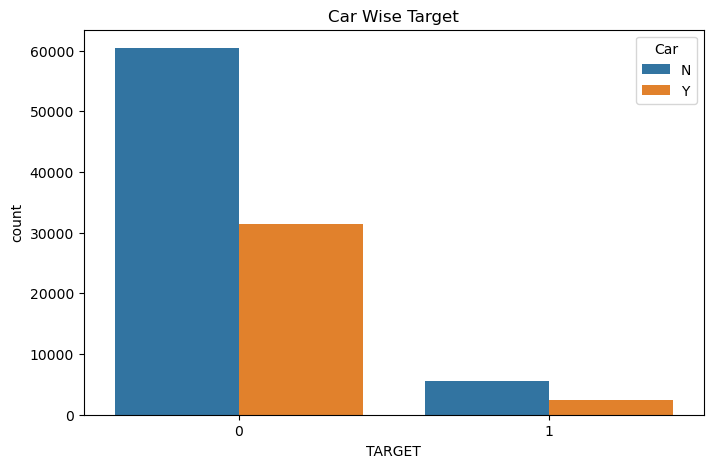

In [82]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='Car',data=londf)
plt.title("Car Wise Target")
plt.show()

From the above graph we can see that people with less no. of cars or no cars are defaulter.

**5.CNT_CHILDREN**

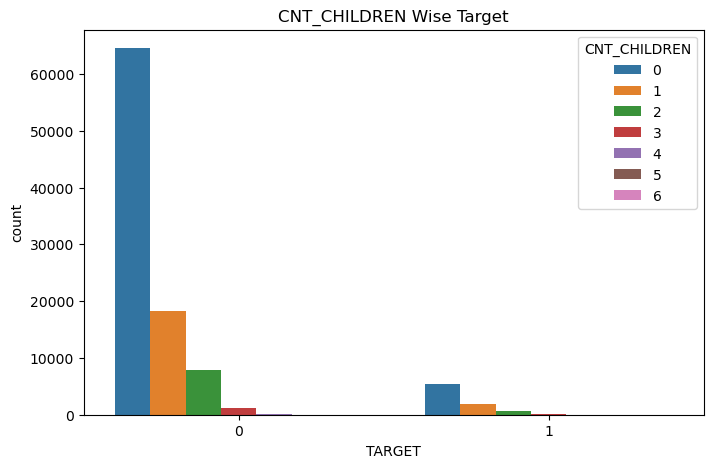

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=londf)
plt.title("CNT_CHILDREN Wise Target")
plt.show()

The people with childern increase the percentage of the defaulter also increases.

**6.NAME_TYPE_SUITE**

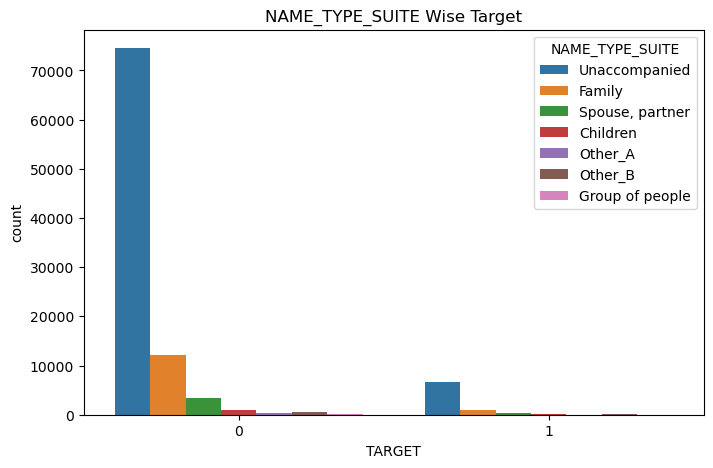

In [84]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='NAME_TYPE_SUITE',data=londf)
plt.title("NAME_TYPE_SUITE Wise Target")
plt.show()

From the abovee graph we can see that the people who were unaccompanied are the defaulters.

## 7.NAME_INCOME_TYPE

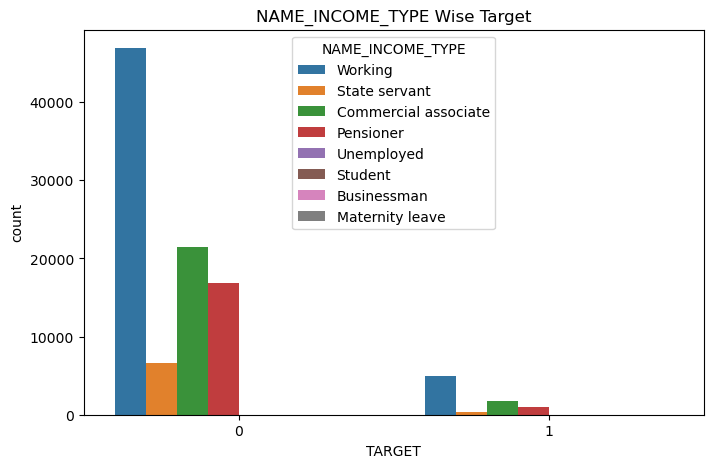

In [85]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=londf)
plt.title("NAME_INCOME_TYPE Wise Target")
plt.show()

People who have a income type as state servant are considered as defaulter.

**8.NAME_EDUCATION_TYPE**

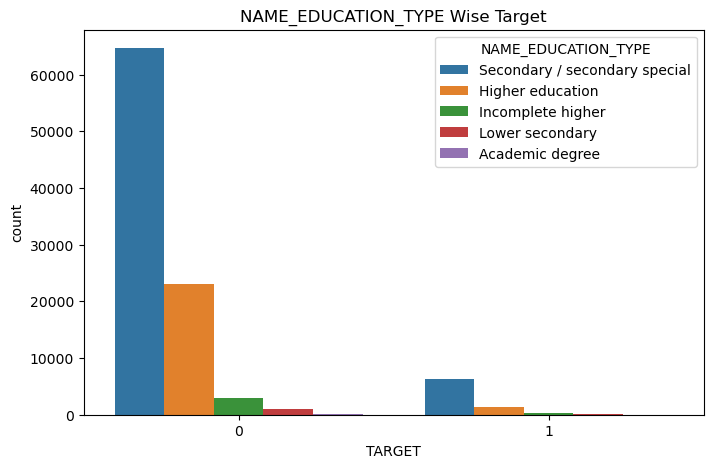

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=londf)

plt.title("NAME_EDUCATION_TYPE Wise Target")
plt.show()

**9.NAME_FAMILY_STATUS**

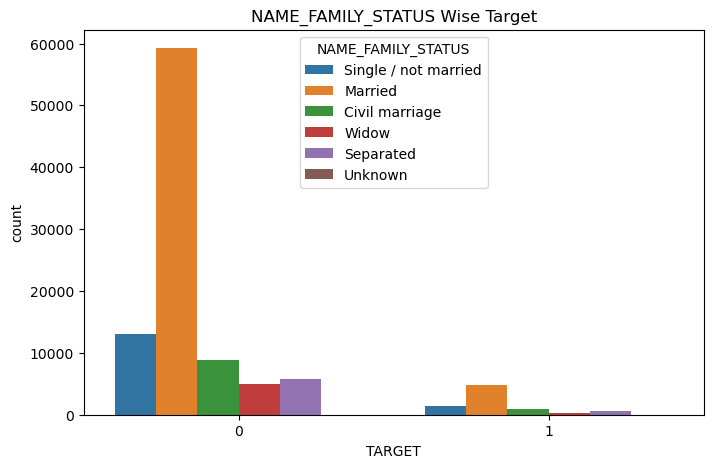

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=londf)
plt.title("NAME_FAMILY_STATUS Wise Target")
plt.show()

Widowed people are less like to be trusted.

**10.MOBILE_REACHABLE**

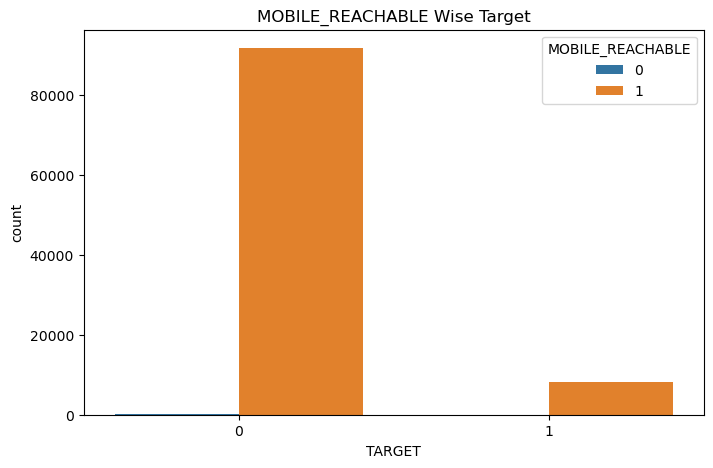

In [88]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='MOBILE_REACHABLE',data=londf)
plt.title("MOBILE_REACHABLE Wise Target")
plt.show()

**11.FLAG_EMAIL**

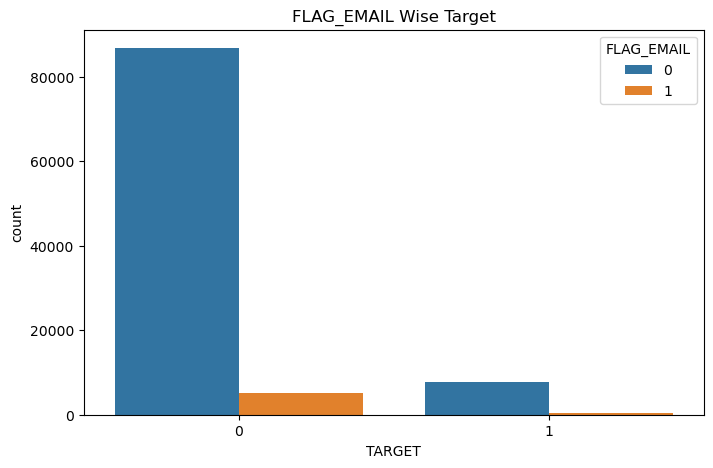

In [89]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='FLAG_EMAIL',data=londf)
plt.title("FLAG_EMAIL Wise Target")
plt.show()

People with no emalis are defaulter

**12.OCCUPATION_TYPE**

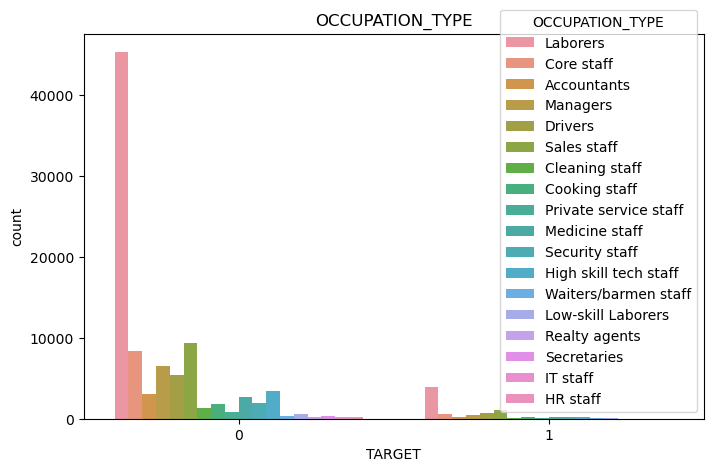

In [90]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=londf)
plt.title("OCCUPATION_TYPE")
plt.show()

Occupations such as HR Staff , Secretaries are less likely to be trusted.

**13.CNT_FAM_MEMBERS**

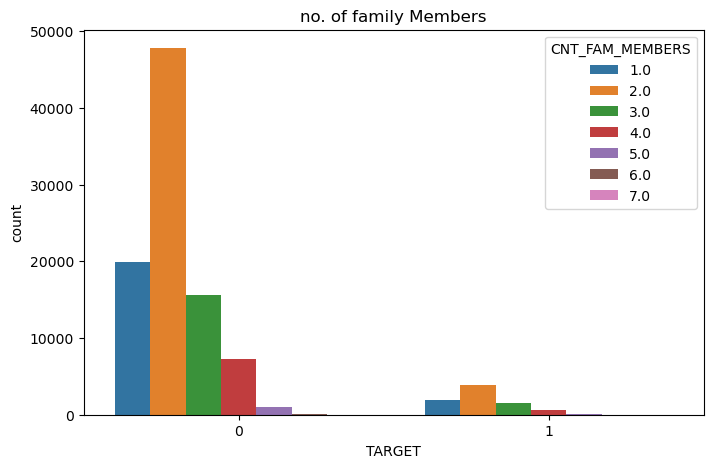

In [91]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='CNT_FAM_MEMBERS',data=londf)
plt.title("no. of family Members")
plt.show()

People with familiy members more than 4 are less likely to be trusted.

**14.TOTAL_DOC_SUBMITTED**

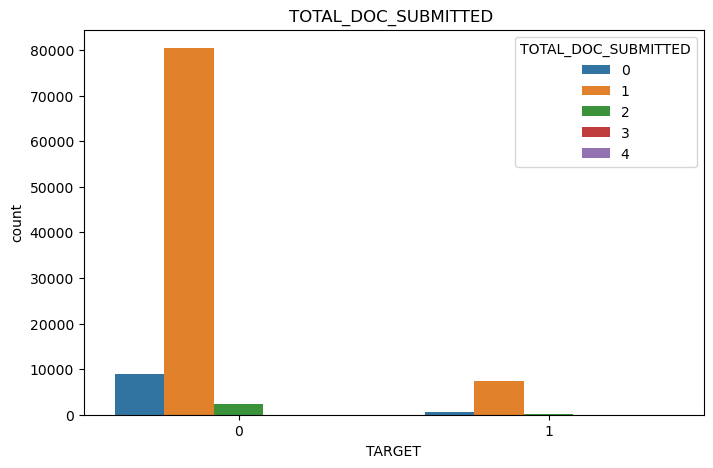

In [92]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='TOTAL_DOC_SUBMITTED',data=londf)
plt.title("TOTAL_DOC_SUBMITTED ")
plt.show()

People with only 1 document are less likely to be trusted.

**15. DAYS_EMPLOYED**

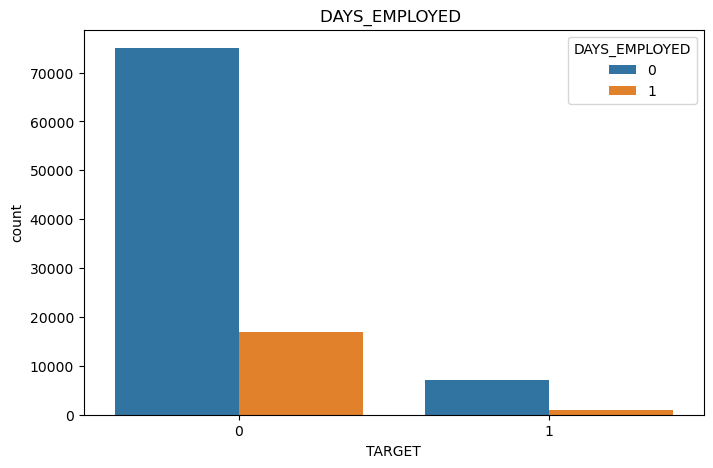

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='TARGET',hue='DAYS_EMPLOYED',data=londf)
plt.title("DAYS_EMPLOYED ")
plt.show()

People who are not employeed are less likely to be trusted.

# Categorial to Numerical

**1.AMT_INCOME_TOTAL**

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

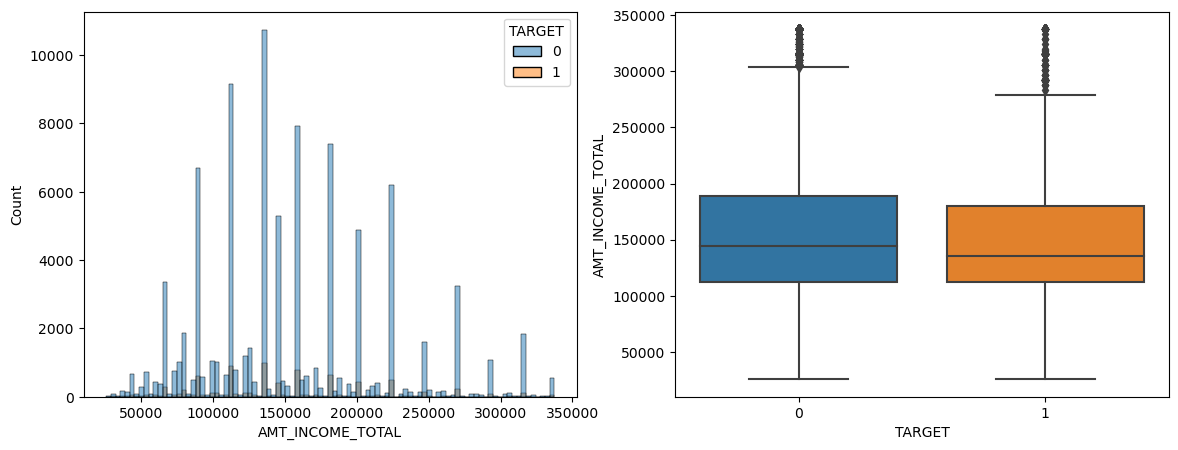

In [94]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =londf['AMT_INCOME_TOTAL'], hue=londf['TARGET'],ax=ax[0])
sns.boxplot(y =londf['AMT_INCOME_TOTAL'], x=londf['TARGET'],ax=ax[1])

**2.AMT_CREDIT**

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

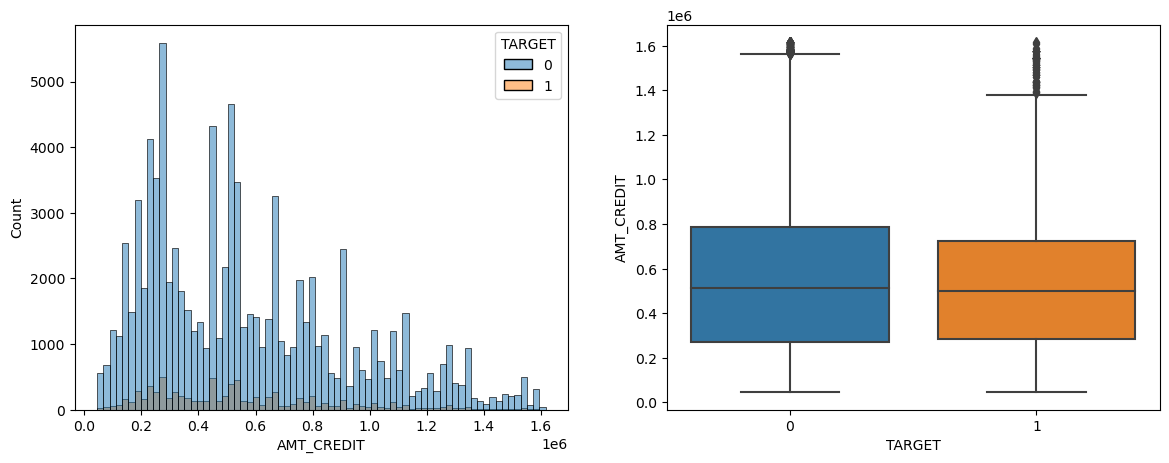

In [95]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =londf['AMT_CREDIT'], hue=londf['TARGET'],ax=ax[0])
sns.boxplot(y =londf['AMT_CREDIT'], x=londf['TARGET'],ax=ax[1])

**3.AMT_GOODS_PRICE**

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

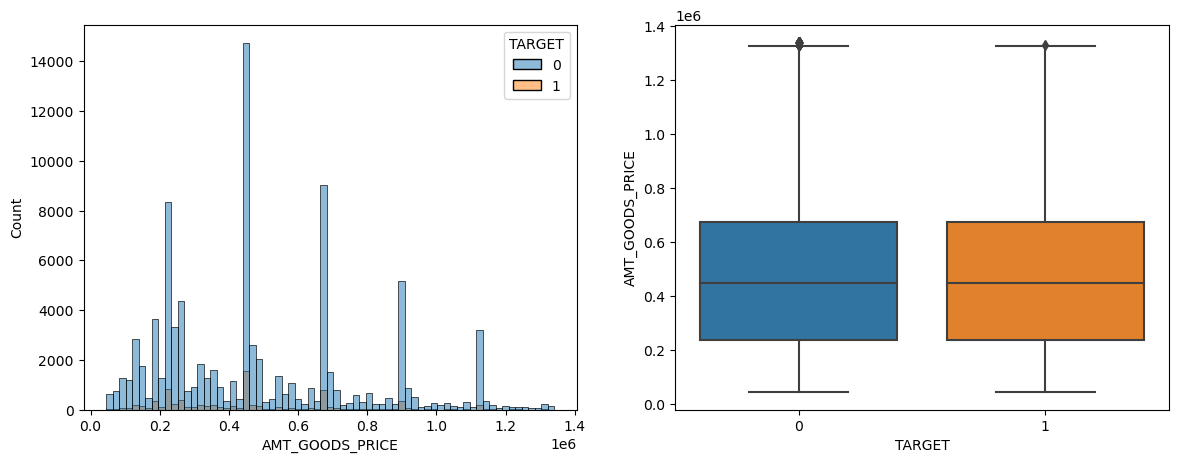

In [96]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =londf['AMT_GOODS_PRICE'], hue=londf['TARGET'],ax=ax[0])
sns.boxplot(y =londf['AMT_GOODS_PRICE'], x=londf['TARGET'],ax=ax[1])

In [97]:
londf['AMT_INCOME_TOTAL'].min()

25650.0

In [98]:
londf['AMT_INCOME_TOTAL'].max()

337500.0

In [99]:
londf['AMT_CREDIT'].min()

45000.0

In [100]:
londf['AMT_CREDIT'].max()

1616278.5

In [101]:
londf['AMT_GOODS_PRICE'].min()

45000.0

In [102]:
londf['AMT_GOODS_PRICE'].max()

1341000.0

# Multivariate

**For Client with no payment difficulties and are employed**

In [103]:
londf['DAYS_EMPLOYED'].value_counts()

0    82135
1    17865
Name: DAYS_EMPLOYED, dtype: int64

In [104]:
londf['TARGET'].value_counts()

0    91907
1     8093
Name: TARGET, dtype: int64

In [105]:
londf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,0,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,0,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,0,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,0,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,0,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


**Condition 1: Car yes, House Yes and Employes Yes wrt Total Income**

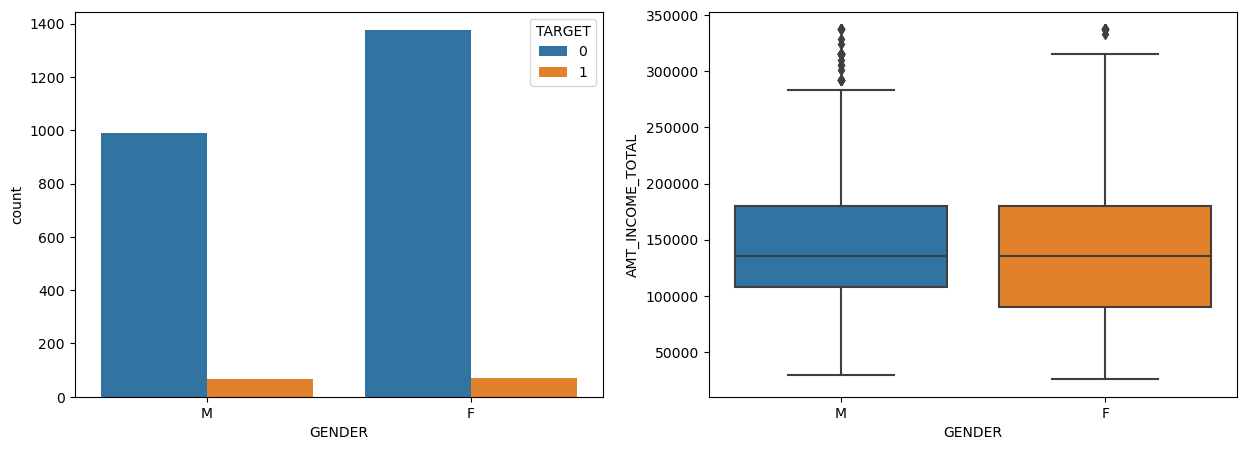

F :4.84%
M :6.24%


In [146]:
cond1 = londf[(londf['Car']=='Y')&(londf['House']=='Y')&(londf['DAYS_EMPLOYED']==1)]
#a=londf[cond1]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GENDER',hue='TARGET',data=cond1,ax=ax[0])
sns.boxplot(x='GENDER',y='AMT_INCOME_TOTAL',data=cond1,ax=ax[1])
plt.show()
for i in list(cond1['GENDER'].value_counts().index):
    numer=len(cond1[(cond1['GENDER']==i)&(cond1.TARGET==1)])
    demo=len(cond1[cond1['GENDER']==i])
    b=numer*100/demo
    print(f'{i} :{round(b,2)}%')

Males with cars and House who are employed are less likely to be trusted and have the same average income with females.  

**Condition 2: Contract Cash loan and employed wrt credit amount of loan**

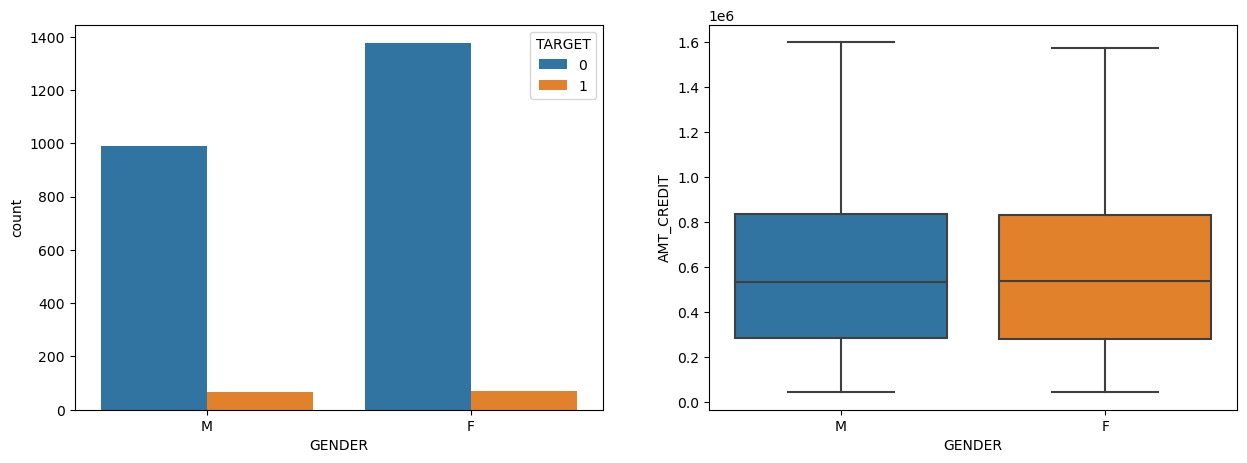

F :5.01%
M :7.77%


In [147]:
cond2 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['DAYS_EMPLOYED']==1)]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GENDER',hue='TARGET',data=cond1,ax=ax[0])
sns.boxplot(x='GENDER',y='AMT_CREDIT',data=cond1,ax=ax[1])
plt.show()
for i in list(cond2['GENDER'].value_counts().index):
    numer=len(cond2[(cond2['GENDER']==i)&(cond2.TARGET==1)])
    demo=len(cond2[cond2['GENDER']==i])
    b=numer*100/demo
    print(f'{i} :{round(b,2)}%')

Males with Cash loans and are employed are less likely to be trusted and are given the same credit amount for the loan.

**Condition 3: Contract cash loan, Car yes, house yes, wrt Credit amount of the loan**

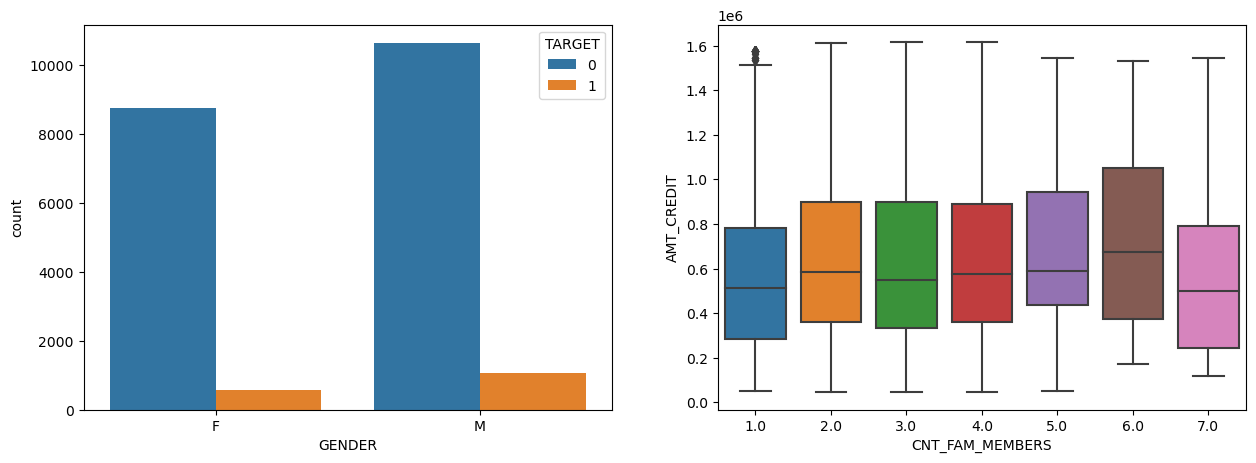

M :9.05%
F :6.26%


In [140]:
cond3 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['Car']=='Y')&(londf['House']=='Y')]
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GENDER',hue='TARGET',data=cond3,ax=ax[0])
sns.boxplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT',data=cond3,ax=ax[1])
plt.show()
for i in list(cond3['GENDER'].value_counts().index):
    numer=len(cond3[(cond3['GENDER']==i)&(cond3.TARGET==1)])
    demo=len(cond3[cond3['GENDER']==i])
    b=numer*100/demo
    print(f'{i} :{round(b,2)}%')

 From the above graph we can see that Males are the defaulters, the credit amount of the family with 1 and 7 members are the same.

**Condition 4: Contract Cash, Car No, House yes, Occupations wrt to total Income**

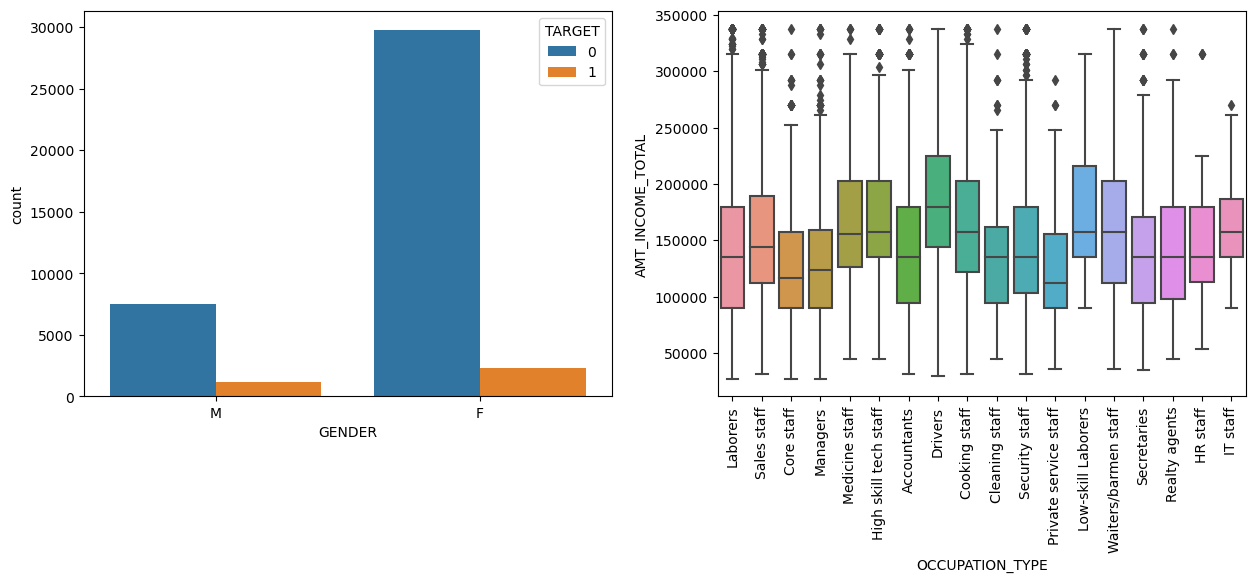

Laborers :8.09%
Sales staff :10.69%
Core staff :7.07%
Managers :7.56%
Medicine staff :7.4%
High skill tech staff :6.79%
Accountants :6.4%
Drivers :15.38%
Cooking staff :9.78%
Cleaning staff :9.57%
Security staff :12.07%
Private service staff :7.25%
Low-skill Laborers :22.52%
Waiters/barmen staff :9.42%
Secretaries :6.58%
Realty agents :10.75%
HR staff :10.0%
IT staff :4.65%


In [149]:
cond4 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['Car']=='N')&(londf['House']=='Y')]
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GENDER',hue='TARGET',data=cond4,ax=ax[0])
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=cond4,ax=ax[1])
ax[1].set_xticklabels(labels=cond4['OCCUPATION_TYPE'].value_counts().index,rotation=90, fontsize=10)
#ax[0].set_xticklabels(labels=cond4['OCCUPATION_TYPE'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond4['OCCUPATION_TYPE'].value_counts().index):
    numer=len(cond4[(cond4['OCCUPATION_TYPE']==i)&(cond4.TARGET==1)])
    demo=len(cond4[cond4['OCCUPATION_TYPE']==i])
    b=numer*100/demo
    print(f'{i} :{round(b,2)}%')

From the above graph we found that Females are the possible defaulters, and the people having occupations in low-skill laborers, Realty agents, Security Staff, Sales Staff , HR staff and Drivers are possible defaulters and less likely to be trusted.

**Condition 5:contract Cash, Income type wrt to total Income**

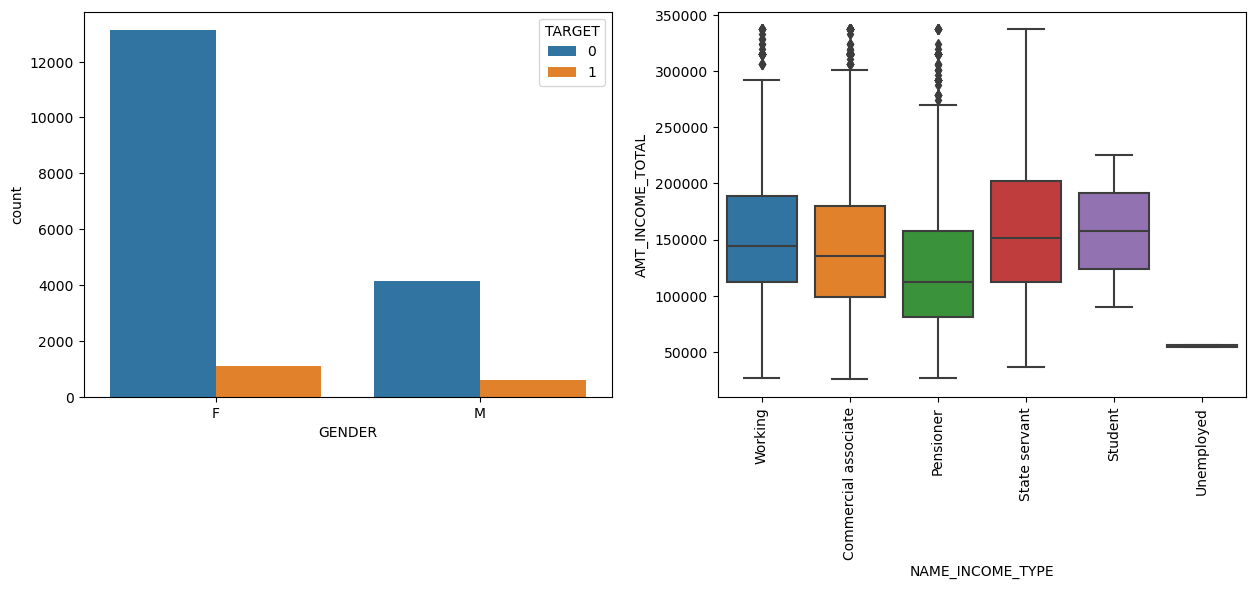

Working:10.76%
Commercial associate:8.2%
Pensioner:5.89%
State servant:6.07%
Student:0.0%
Unemployed:0.0%


In [159]:
cond5 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['Car']=='N')&(londf['House']=='N')]

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GENDER',hue='TARGET',data=cond5,ax=ax[0])
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=cond5,ax=ax[1])
ax[1].set_xticklabels(labels=cond5['NAME_INCOME_TYPE'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond5['NAME_INCOME_TYPE'].value_counts().index):
    numer=len(cond5[(cond5['NAME_INCOME_TYPE']==i)&(cond5.TARGET==1)])
    denom=len(cond5[(cond5['NAME_INCOME_TYPE']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the above chart after the analysis we can see that for Females with no car , contract cash and having a house with job type of working class are less likly to be trusted and hence considered as a defaulter.

**Condition 6:contract Cash , having a car and a house working occupation type wrt credit amount of loan**

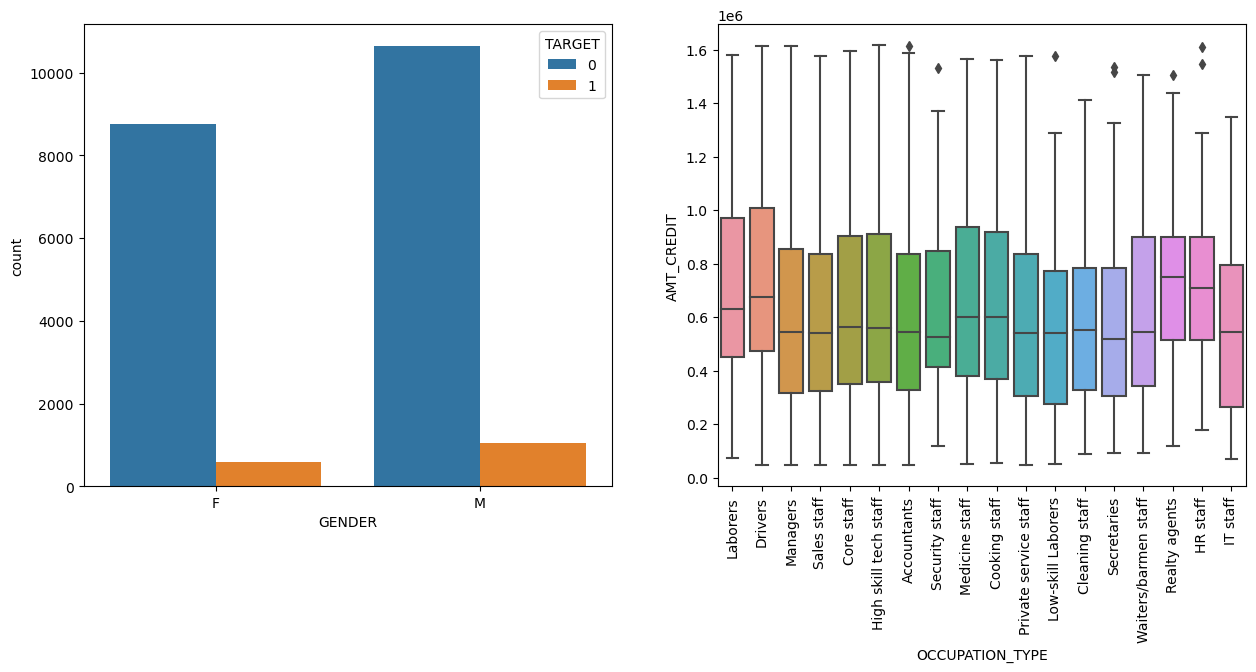

Laborers:8.04%
Drivers:10.27%
Managers:6.13%
Sales staff:8.29%
Core staff:6.82%
High skill tech staff:6.67%
Accountants:4.04%
Security staff:8.67%
Medicine staff:5.34%
Cooking staff:9.27%
Private service staff:4.03%
Low-skill Laborers:9.79%
Cleaning staff:8.8%
Secretaries:4.35%
Waiters/barmen staff:10.53%
Realty agents:9.26%
HR staff:3.45%
IT staff:4.0%


In [151]:
cond6 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['Car']=='Y')&(londf['House']=='Y')]
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='GENDER',hue='TARGET',data=cond6,ax=ax[0])
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=cond6,ax=ax[1])
ax[1].set_xticklabels(labels=cond6['OCCUPATION_TYPE'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond6['OCCUPATION_TYPE'].value_counts().index):
    numer=len(cond6[(cond6['OCCUPATION_TYPE']==i)&(cond6.TARGET==1)])
    denom=len(cond6[(cond6['OCCUPATION_TYPE']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the chart after the analysis we find that Males having a car and a house with occupation Drivers , Reality agents, Waiters, low skill laborers are less likely to be trusted and are considered are defaulters, Medicine staff , Secretaries , HR staff, Accountants are given high credit amount for a loan.

**Condition 7: Contract Cash and having 2 children of family status wrt credit amount of loan**

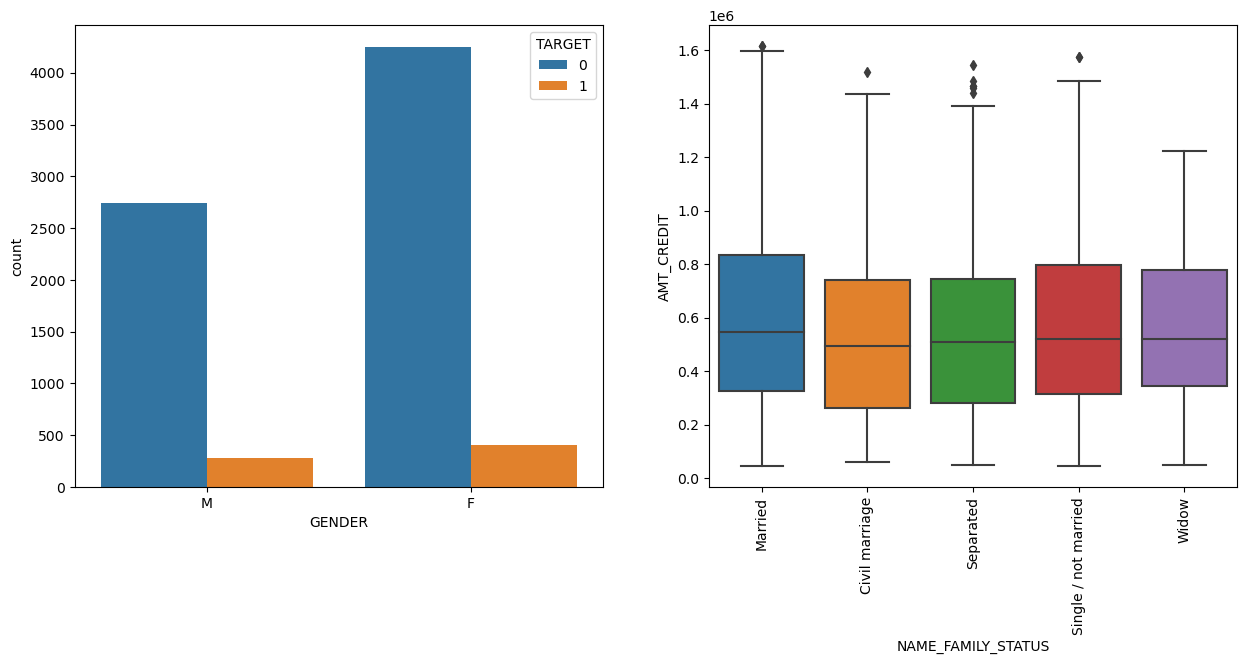

Married:8.61%
Civil marriage:11.13%
Separated:9.48%
Single / not married:10.4%
Widow:8.96%


In [113]:
cond7 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['CNT_CHILDREN']==2.0)]

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='GENDER',hue='TARGET',data=cond7,ax=ax[0])
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_CREDIT',data=cond7,ax=ax[1])
ax[1].set_xticklabels(labels=cond6['NAME_FAMILY_STATUS'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond7['NAME_FAMILY_STATUS'].value_counts().index):
    numer=len(cond7[(cond7['NAME_FAMILY_STATUS']==i)&(cond7.TARGET==1)])
    denom=len(cond7[(cond7['NAME_FAMILY_STATUS']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the above graph we can see that for Females with cash loans and having 2 children with family status of Civil marriage, Singles  are less likely to be trusted and can be potential defaulters.

**Condition 8: contect cash , children 1 , employed having family status wrt total income**

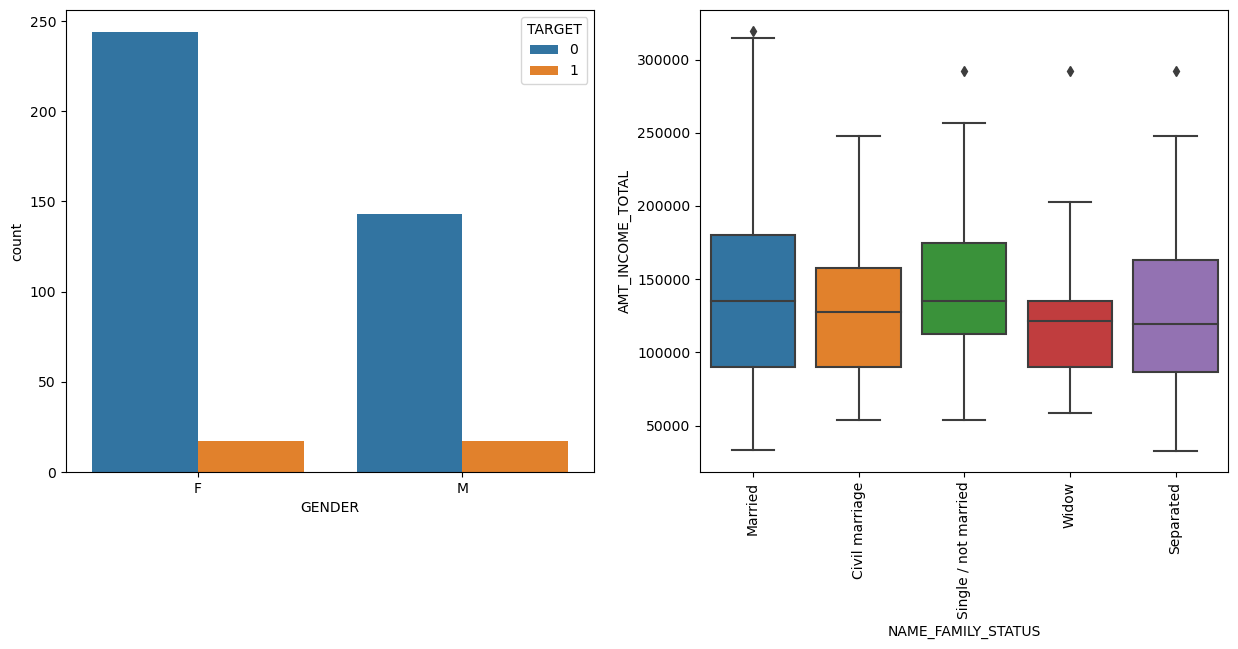

Married:7.82%
Civil marriage:7.89%
Single / not married:11.76%
Widow:6.45%
Separated:8.33%


In [153]:
cond8 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['CNT_CHILDREN']==1)&(londf['DAYS_EMPLOYED']==1)]

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='GENDER',hue='TARGET',data=cond8,ax=ax[0])
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=cond8,ax=ax[1])
ax[1].set_xticklabels(labels=cond8['NAME_FAMILY_STATUS'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond8['NAME_FAMILY_STATUS'].value_counts().index):
    numer=len(cond8[(cond8['NAME_FAMILY_STATUS']==i)&(cond8.TARGET==1)])
    denom=len(cond8[(cond8['NAME_FAMILY_STATUS']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the above chart we see that Males with cash loan , having 1 child and are employed belonging to family status of Single and Seperated are less likely to be trusted and are the possible defaulters.

**Condition 9: Contract Cash , employed and Children count wrt Total Income**

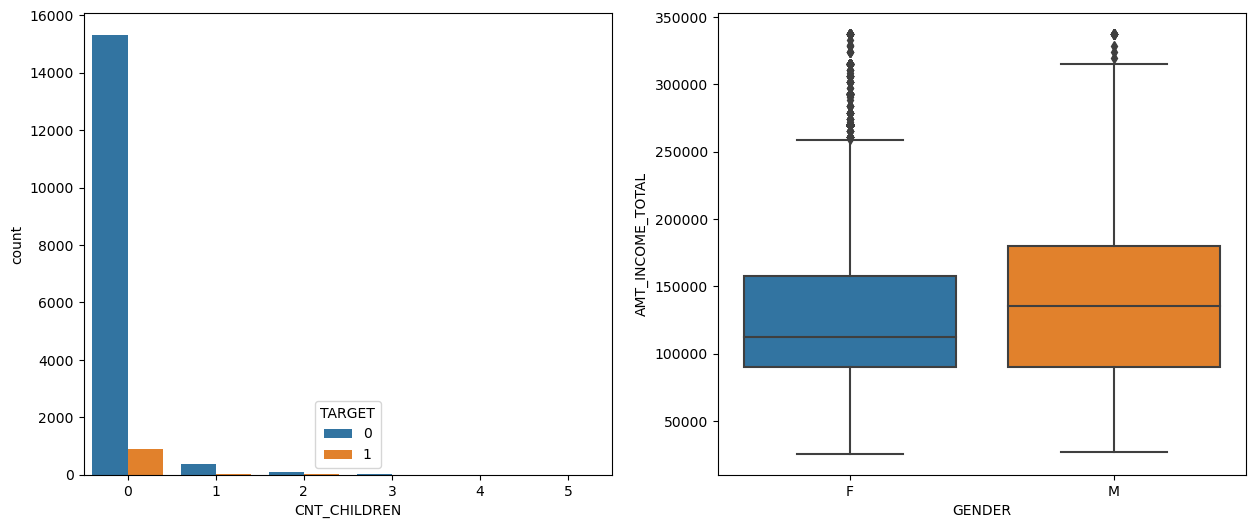

F:5.01%
M:7.77%


In [156]:
cond9 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['DAYS_EMPLOYED']==1)]

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='CNT_CHILDREN',hue='TARGET',data=cond9,ax=ax[0])
sns.boxplot(x='GENDER',y='AMT_INCOME_TOTAL',data=cond9,ax=ax[1])
#ax[1].set_xticklabels(labels=cond9['GENDER'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond9['GENDER'].value_counts().index):
    numer=len(cond9[(cond9['GENDER']==i)&(cond9.TARGET==1)])
    denom=len(cond9[(cond9['GENDER']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the above chart we can see that Males having children more than 2 who are employed are the possible defaulters even though their income is more.

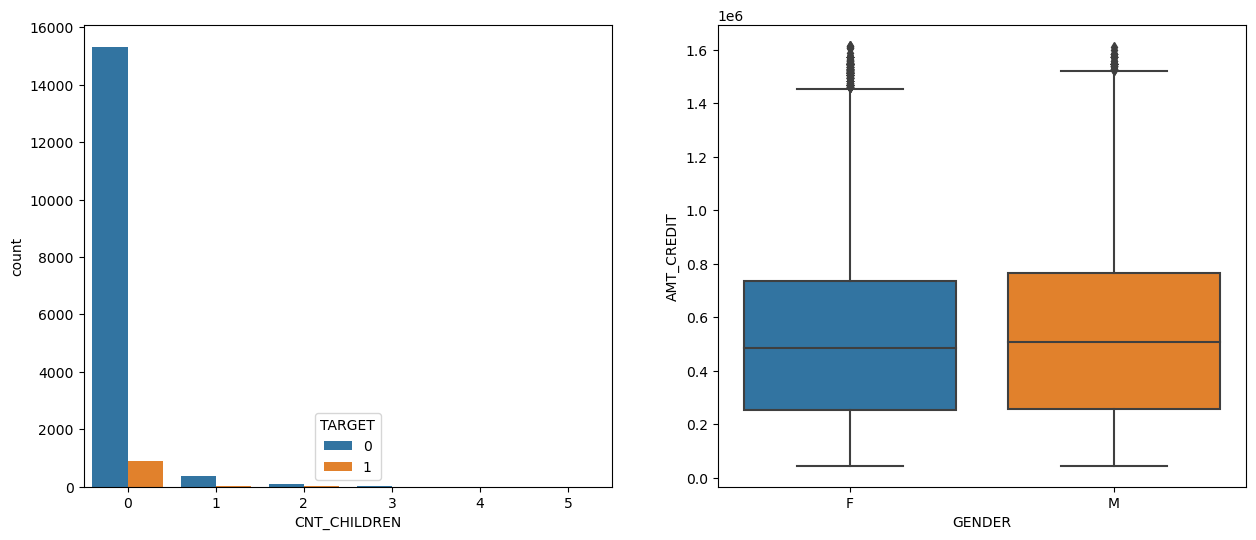

F:5.01%
M:7.77%


In [158]:
cond10 = londf[(londf['NAME_CONTRACT_TYPE']=='Cash loans')&(londf['DAYS_EMPLOYED']==1)]

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='CNT_CHILDREN',hue='TARGET',data=cond10,ax=ax[0])
sns.boxplot(x='GENDER',y='AMT_CREDIT',data=cond10,ax=ax[1])
#ax[1].set_xticklabels(labels=cond9['GENDER'].value_counts().index,rotation=90, fontsize=10)
plt.show()
for i in list(cond10['GENDER'].value_counts().index):
    numer=len(cond10[(cond10['GENDER']==i)&(cond10.TARGET==1)])
    denom=len(cond10[(cond10['GENDER']==i)])
    d=numer*100/denom
    print(f'{i}:{round(d,2)}%')

From the above chart we can see that Males having children more than 2 who are employed are the possible defaulters even though they are given the same credit as Females.

# Overall Summary

1. People with a car and a house and with family members more than 2 can be given more credit and Males in this case are considered as possible defaulters.  
2. People with cash loans , no car and a house with an occupation of low skill laborers , HR , Sales and Security Staff and Drivers who are Females are possible defaulters.  
3. People with no car . no house and coming from a working class and commercial associates who are females are possible defaulters.  
4. People with cash loan and 2 children having status of civil marriage and single are the possible defaulters whoe are females . Married status females can be given more credit.  
5. People with only one child and are employed who are Male with status Single, Seperated are the possible defaulters . Married people have a higher income.